# Netflix Project

In [304]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import streamlit as st

In [305]:
movie=pd.read_csv("movies.csv")

In [306]:
movie.head()

,movie_id,title,content_type,genre_primary,genre_secondary,release_year,duration_minutes,rating,language,country_of_origin,imdb_rating,production_budget,box_office_revenue,number_of_seasons,number_of_episodes,is_netflix_original,added_to_platform,content_warning
0,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,NaN,NaN,NaN,NaN,NaN,False,2023-08-07,False
1,movie_0002,Storm Warrior,Stand-up Comedy,Sci-Fi,NaN,2017,37.0,PG,Japanese,USA,3.3,NaN,NaN,NaN,NaN,False,2022-01-28,True
2,movie_0003,Fire Family,Movie,Drama,NaN,2003,142.0,TV-MA,English,USA,8.5,2114120.0,NaN,NaN,NaN,False,2021-05-04,True
3,movie_0004,Our Princess,Documentary,Sci-Fi,NaN,2011,131.0,NC-17,Japanese,USA,5.3,NaN,NaN,NaN,NaN,False,2022-11-26,False
4,movie_0005,Warrior Mission,Documentary,Sport,Mystery,2015,91.0,TV-G,English,USA,3.1,NaN,NaN,NaN,NaN,False,2023-06-15,False


# User details

movie.tail()

In [307]:
user=pd.read_csv("users.csv")

In [308]:
user.tail()

,user_id,email,first_name,last_name,age,gender,country,state_province,city,subscription_plan,subscription_start_date,is_active,monthly_spend,primary_device,household_size,created_at
10295,user_04613,glawson@example.com,Diane,Thomas,8.0,Female,USA,Georgia,Wandamouth,Premium,2024-08-18,True,2.84,Desktop,3.0,2025-01-03 18:42:59.345803
10296,user_09468,mcox@example.org,Laurie,Young,37.0,Female,USA,North Carolina,Gomezshire,Basic,2022-09-27,False,13.76,Smart TV,2.0,2023-04-22 01:11:07.403510
10297,user_09414,mcdonaldkeith@example.net,James,Dillon,39.0,Male,USA,Tennessee,North Dennischester,Standard,2023-11-15,True,20.85,Tablet,2.0,2022-08-11 09:56:11.336213
10298,user_07950,adam74@example.net,Isaac,Cook,NaN,Female,Canada,Alberta,Ellenchester,Basic,2025-07-09,True,10.19,Smart TV,5.0,2024-12-09 21:10:19.694161
10299,user_09958,debraking@example.com,Amber,Phillips,35.0,Male,USA,Pennsylvania,Rogerberg,Premium+,2024-11-04,True,8.57,Mobile,5.0,2024-07-21 03:27:05.398770


In [309]:
user.groupby('subscription_plan').size().sort_values()

subscription_plan
Premium+    1036
Basic       2020
Premium     3619
Standard    3625
dtype: int64

In [310]:
user.groupby('subscription_plan')['monthly_spend'].mean()

subscription_plan
Basic       20.456976
Premium     21.697761
Premium+    20.429565
Standard    24.017417
Name: monthly_spend, dtype: float64

In [311]:
user['subscription_plan'].value_counts()
user.groupby('subscription_plan')['monthly_spend'].sum()


subscription_plan
Basic       37211.24
Premium     71038.47
Premium+    18774.77
Standard    78560.97
Name: monthly_spend, dtype: float64

Text(0.5, 1.0, 'How much taken by')

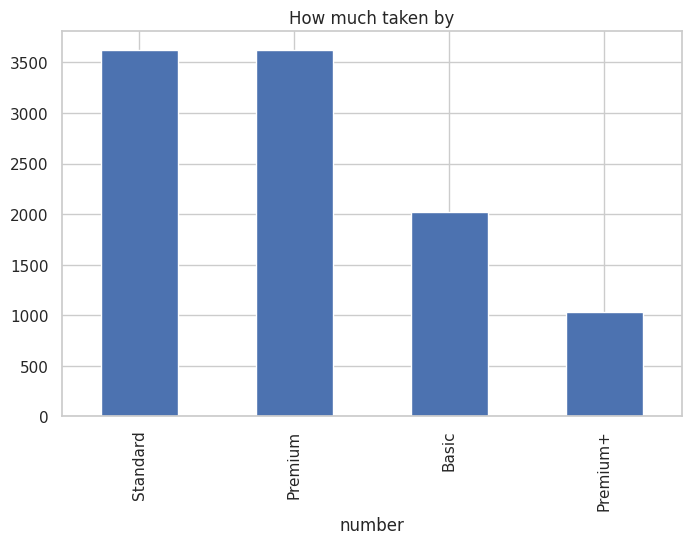

In [312]:
n=user['subscription_plan'].value_counts()
n.plot(kind='bar', figsize=(8,5))
plt.xlabel("number")

plt.title("How much taken by")

# Watch History

In [313]:
watch=pd.read_csv("watch_history.csv")

In [314]:
watch.head()

,session_id,user_id,movie_id,watch_date,device_type,watch_duration_minutes,progress_percentage,action,quality,location_country,is_download,user_rating
0,session_000001,user_07271,movie_0511,2025-11-13,Tablet,63.9,34.6,completed,HD,USA,False,NaN
1,session_000002,user_00861,movie_0588,2025-02-26,Laptop,120.1,44.2,started,HD,USA,False,NaN
2,session_000003,user_05391,movie_0694,2024-12-15,Desktop,572.1,84.7,started,HD,Canada,False,1.0
3,session_000004,user_05192,movie_0234,2024-09-30,Desktop,395.3,89.9,completed,SD,USA,False,5.0
4,session_000005,user_05735,movie_0390,2024-08-04,Tablet,14.6,6.2,completed,HD,USA,False,NaN


In [315]:
search=pd.read_csv("search_logs.csv")

In [316]:
search.tail()

,search_id,user_id,search_query,search_date,results_returned,clicked_result_position,device_type,search_duration_seconds,had_typo,used_filters,location_country
26495,search_004094,user_02131,stand up comedy,2025-05-09,80,6.0,Smart TV,25.0,True,True,Canada
26496,search_007094,user_07935,thriller series,2024-03-05,36,NaN,Smart TV,15.6,False,True,USA
26497,search_003206,user_05028,classic movies,2024-11-12,18,4.0,Smart TV,24.6,False,False,Canada
26498,search_000206,user_09780,comedy shows,2025-06-04,83,NaN,Laptop,16.1,False,False,USA
26499,search_018032,user_07537,stand up comedy,2024-03-29,9,2.0,Laptop,31.5,False,False,Canada


# Review 

In [317]:
review=pd.read_csv("reviews.csv")

In [318]:
review.head()

,review_id,user_id,movie_id,rating,review_date,device_type,is_verified_watch,helpful_votes,total_votes,review_text,sentiment,sentiment_score
0,review_000001,user_07066,movie_0360,4,2025-03-29,Mobile,False,3.0,5.0,Fantastic cinematography and plot twists.,positive,0.711
1,review_000002,user_02953,movie_0095,5,2024-07-19,Mobile,True,2.0,2.0,This series is a masterpiece!,positive,0.645
2,review_000003,user_05528,movie_0518,4,2025-02-11,Tablet,True,2.0,5.0,Fantastic cinematography and plot twists.,positive,0.730
3,review_000004,user_07612,movie_0672,5,2025-11-26,Mobile,True,7.0,7.0,One of the best series I've ever watched. High...,positive,0.798
4,review_000005,user_03424,movie_0580,3,2025-07-11,Mobile,True,1.0,5.0,Mixed feelings about this one.,neutral,0.410


# Shape used to to find total number of row and columns 

In [319]:
movie.shape

(1040, 18)

In [320]:
review.shape

(15450, 12)

In [321]:
watch.shape

(105000, 12)

In [322]:
user.shape

(10300, 16)

# Size used to know total number of element

In [323]:
movie.size

18720

In [324]:
review.size

185400

In [325]:
user.size

164800

In [326]:
watch.size

1260000

# Columns show the content  Name

In [327]:
movie.columns

Index(['movie_id', 'title', 'content_type', 'genre_primary', 'genre_secondary',
       'release_year', 'duration_minutes', 'rating', 'language',
       'country_of_origin', 'imdb_rating', 'production_budget',
       'box_office_revenue', 'number_of_seasons', 'number_of_episodes',
       'is_netflix_original', 'added_to_platform', 'content_warning'],
      dtype='object')

In [328]:
review.columns

Index(['review_id', 'user_id', 'movie_id', 'rating', 'review_date',
       'device_type', 'is_verified_watch', 'helpful_votes', 'total_votes',
       'review_text', 'sentiment', 'sentiment_score'],
      dtype='object')

In [329]:
user.columns

Index(['user_id', 'email', 'first_name', 'last_name', 'age', 'gender',
       'country', 'state_province', 'city', 'subscription_plan',
       'subscription_start_date', 'is_active', 'monthly_spend',
       'primary_device', 'household_size', 'created_at'],
      dtype='object')

In [330]:
watch.columns

Index(['session_id', 'user_id', 'movie_id', 'watch_date', 'device_type',
       'watch_duration_minutes', 'progress_percentage', 'action', 'quality',
       'location_country', 'is_download', 'user_rating'],
      dtype='object')

# Dtypes show the Data types 

In [331]:
movie.dtypes
watch.dtypes
user.dtypes
review.dtypes

review_id             object
user_id               object
movie_id              object
rating                 int64
review_date           object
device_type           object
is_verified_watch       bool
helpful_votes        float64
total_votes          float64
review_text           object
sentiment             object
sentiment_score      float64
dtype: object

# Info method gives to object types of data

In [332]:
movie.info

<bound method DataFrame.info of         movie_id            title     content_type genre_primary  \
0     movie_0001    Dragon Legend  Stand-up Comedy       History   
1     movie_0002    Storm Warrior  Stand-up Comedy        Sci-Fi   
2     movie_0003      Fire Family            Movie         Drama   
3     movie_0004     Our Princess      Documentary        Sci-Fi   
4     movie_0005  Warrior Mission      Documentary         Sport   
...          ...              ...              ...           ...   
1035  movie_0140      City Empire      Documentary         Sport   
1036  movie_0517     Storm Legend        TV Series           War   
1037  movie_0696     House Empire   Limited Series     Biography   
1038  movie_0056     Big Princess            Movie     Adventure   
1039  movie_0652        Our Night            Movie       History   

     genre_secondary  release_year  duration_minutes rating  language  \
0           Thriller          2014              35.0   TV-Y    French   
1    

# Describe() method gives us summary statistics for numerical

In [333]:
movie.describe

<bound method NDFrame.describe of         movie_id            title     content_type genre_primary  \
0     movie_0001    Dragon Legend  Stand-up Comedy       History   
1     movie_0002    Storm Warrior  Stand-up Comedy        Sci-Fi   
2     movie_0003      Fire Family            Movie         Drama   
3     movie_0004     Our Princess      Documentary        Sci-Fi   
4     movie_0005  Warrior Mission      Documentary         Sport   
...          ...              ...              ...           ...   
1035  movie_0140      City Empire      Documentary         Sport   
1036  movie_0517     Storm Legend        TV Series           War   
1037  movie_0696     House Empire   Limited Series     Biography   
1038  movie_0056     Big Princess            Movie     Adventure   
1039  movie_0652        Our Night            Movie       History   

     genre_secondary  release_year  duration_minutes rating  language  \
0           Thriller          2014              35.0   TV-Y    French   
1  

# Remove the duplicate values in movie , review,user and wathing history and implace

In [334]:
movie[movie.duplicated()]

,movie_id,title,content_type,genre_primary,genre_secondary,release_year,duration_minutes,rating,language,country_of_origin,imdb_rating,production_budget,box_office_revenue,number_of_seasons,number_of_episodes,is_netflix_original,added_to_platform,content_warning
1000,movie_0846,Storm Family,Stand-up Comedy,Action,Mystery,2024,61.0,TV-MA,English,USA,4.8,NaN,NaN,NaN,NaN,False,2024-03-03,True
1001,movie_0814,Adventure Legend,TV Series,Adventure,NaN,2004,62.0,TV-Y7,Korean,USA,6.3,NaN,NaN,11.0,13.0,False,2022-03-04,False
1002,movie_0537,New Story,Movie,Horror,NaN,1998,67.0,PG-13,Italian,UK,5.6,3291844.0,9.314738e+06,NaN,NaN,True,2022-08-16,True
1003,movie_0996,Secret Mission,TV Series,Sci-Fi,NaN,1997,69.0,NC-17,English,South Korea,6.4,NaN,NaN,2.0,24.0,False,2021-05-28,True
1004,movie_0586,A Adventure,Documentary,Drama,Documentary,2021,99.0,R,English,USA,4.4,NaN,NaN,NaN,NaN,True,2021-10-26,False
1005,movie_0932,Hero Empire,Limited Series,Sci-Fi,Adventure,1992,63.0,NC-17,English,USA,9.0,NaN,NaN,6.0,46.0,False,2021-04-22,False
1006,movie_0746,Fire Journey,Movie,Music,NaN,1995,82.0,TV-MA,Hindi,USA,0.8,954741.0,NaN,NaN,NaN,False,2025-03-09,False
1007,movie_0147,Dark Love,Documentary,Action,NaN,1996,34.0,G,Japanese,UK,3.9,NaN,NaN,NaN,NaN,False,2023-02-11,False
1008,movie_0305,Legend House,Movie,Adventure,Fantasy,1984,113.0,TV-MA,English,Japan,NaN,NaN,5.345563e+07,NaN,NaN,True,2021-06-14,False
1009,movie_0210,Princess Kingdom,Movie,Sport,NaN,2018,83.0,TV-14,German,Canada,2.7,2206961.0,NaN,NaN,NaN,False,2022-02-15,False


In [335]:
movie.drop_duplicates(inplace= True)

In [336]:
movie.shape

(1000, 18)

In [337]:
review.shape

(15450, 12)

In [338]:
review[review.duplicated()]

,review_id,user_id,movie_id,rating,review_date,device_type,is_verified_watch,helpful_votes,total_votes,review_text,sentiment,sentiment_score
15000,review_001399,user_00333,movie_0185,5,2024-08-12,Mobile,True,NaN,NaN,This series is a masterpiece!,positive,0.784
15001,review_000190,user_06417,movie_0591,4,2024-02-13,Tablet,False,NaN,NaN,Fantastic cinematography and plot twists.,positive,0.839
15002,review_005712,user_07865,movie_0948,5,2024-10-09,Laptop,False,5.0,5.0,Incredible story telling. Kept me engaged thro...,positive,NaN
15003,review_011256,user_09490,movie_0444,5,2024-05-25,Laptop,True,3.0,4.0,Absolutely loved this movie. Great acting and ...,positive,0.687
15004,review_002437,user_01854,movie_0250,4,2024-07-08,Laptop,True,3.0,4.0,NaN,positive,0.680
...,...,...,...,...,...,...,...,...,...,...,...,...
15445,review_001361,user_04137,movie_0852,2,2024-02-11,Mobile,True,NaN,NaN,Disappointing. Expected much more.,negative,0.349
15446,review_005885,user_08105,movie_0897,5,2024-12-11,Tablet,True,5.0,5.0,One of the best series I've ever watched. High...,positive,NaN
15447,review_012685,user_04546,movie_0316,5,2025-06-10,Tablet,True,6.0,6.0,Outstanding direction and screenplay.,positive,0.666
15448,review_009572,user_06839,movie_0025,4,2024-11-28,Smart TV,True,3.0,5.0,One of the best series I've ever watched. High...,positive,0.623


In [339]:
review.drop_duplicates(inplace= True)

In [340]:
user[user.duplicated()]

,user_id,email,first_name,last_name,age,gender,country,state_province,city,subscription_plan,subscription_start_date,is_active,monthly_spend,primary_device,household_size,created_at
10000,user_03523,rholloway@example.org,Angela,Franco,56.0,NaN,USA,Arizona,South Ricky,Basic,2022-09-05,True,33.21,Laptop,5.0,2024-12-10 07:27:56.892701
10001,user_03093,angelawhite@example.com,Erik,Mejia,51.0,Female,USA,New Jersey,Lake Williehaven,Premium,2024-07-05,True,NaN,Tablet,4.0,2024-02-02 13:43:23.137114
10002,user_08617,colleen12@example.com,Kenneth,Jarvis,26.0,Male,USA,New Jersey,Lefort,Basic,2024-09-21,True,6.68,Tablet,1.0,2022-08-15 03:45:40.157231
10003,user_07032,powelljohnny@example.org,Patricia,Thompson,NaN,Male,USA,Arizona,Stevenborough,Basic,2022-10-29,True,41.05,Tablet,1.0,2025-03-30 06:34:33.020485
10004,user_04031,clarkpamela@example.org,Patricia,Glover,35.0,Female,USA,Florida,Glennburgh,Standard,2023-03-22,True,4.02,Smart TV,1.0,2024-10-17 23:37:26.536097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10295,user_04613,glawson@example.com,Diane,Thomas,8.0,Female,USA,Georgia,Wandamouth,Premium,2024-08-18,True,2.84,Desktop,3.0,2025-01-03 18:42:59.345803
10296,user_09468,mcox@example.org,Laurie,Young,37.0,Female,USA,North Carolina,Gomezshire,Basic,2022-09-27,False,13.76,Smart TV,2.0,2023-04-22 01:11:07.403510
10297,user_09414,mcdonaldkeith@example.net,James,Dillon,39.0,Male,USA,Tennessee,North Dennischester,Standard,2023-11-15,True,20.85,Tablet,2.0,2022-08-11 09:56:11.336213
10298,user_07950,adam74@example.net,Isaac,Cook,NaN,Female,Canada,Alberta,Ellenchester,Basic,2025-07-09,True,10.19,Smart TV,5.0,2024-12-09 21:10:19.694161


In [341]:
user.drop_duplicates(inplace= True)

In [342]:
watch[watch.duplicated()]

,session_id,user_id,movie_id,watch_date,device_type,watch_duration_minutes,progress_percentage,action,quality,location_country,is_download,user_rating
100000,session_080473,user_08538,movie_0556,2025-10-24,Smart TV,66.4,97.9,completed,SD,USA,False,NaN
100001,session_020231,user_09850,movie_0034,2025-06-09,Mobile,31.2,14.2,completed,4K,USA,False,NaN
100002,session_072192,user_09044,movie_0378,2024-01-30,Tablet,24.0,56.0,started,HD,Canada,True,NaN
100003,session_057785,user_08026,movie_0965,2024-10-02,Tablet,111.2,1.2,paused,HD,Canada,False,NaN
100004,session_044735,user_02244,movie_0985,2024-08-30,Tablet,72.0,NaN,started,HD,USA,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
104995,session_071635,user_08078,movie_0292,2024-04-05,Tablet,39.3,2.4,completed,SD,USA,False,NaN
104996,session_008901,user_07617,movie_0785,2024-07-14,Desktop,18.2,30.1,stopped,HD,USA,False,3.0
104997,session_035626,user_08276,movie_0460,2024-04-24,Desktop,66.1,26.9,stopped,HD,USA,False,NaN
104998,session_006069,user_06231,movie_0869,2024-04-07,Tablet,33.4,98.8,started,Ultra HD,Canada,False,NaN


In [343]:
watch.drop_duplicates(inplace= True)

# if the null values each dataset then show the heatmap

In [344]:
movie.isnull()

,movie_id,title,content_type,genre_primary,genre_secondary,release_year,duration_minutes,rating,language,country_of_origin,imdb_rating,production_budget,box_office_revenue,number_of_seasons,number_of_episodes,is_netflix_original,added_to_platform,content_warning
0,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,True,True,True,True,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,True,True,True,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
997,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False
998,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False


In [345]:
movie.isnull().sum()

movie_id                 0
title                    0
content_type             0
genre_primary            0
genre_secondary        643
release_year             0
duration_minutes         0
rating                   0
language                 0
country_of_origin        0
imdb_rating            144
production_budget      647
box_office_revenue     678
number_of_seasons      725
number_of_episodes     695
is_netflix_original      0
added_to_platform        0
content_warning          0
dtype: int64

<Axes: >

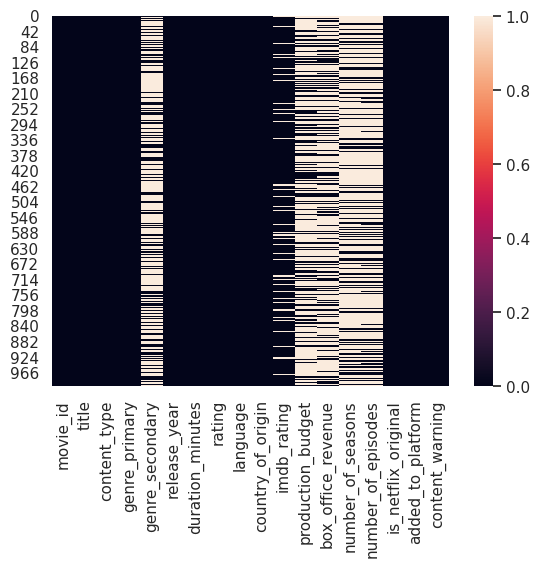

In [346]:
sns.heatmap(movie.isnull())

In [347]:
movie.isnull().sum()

movie_id                 0
title                    0
content_type             0
genre_primary            0
genre_secondary        643
release_year             0
duration_minutes         0
rating                   0
language                 0
country_of_origin        0
imdb_rating            144
production_budget      647
box_office_revenue     678
number_of_seasons      725
number_of_episodes     695
is_netflix_original      0
added_to_platform        0
content_warning          0
dtype: int64

In [348]:
user.isnull().sum()

user_id                       0
email                         0
first_name                    0
last_name                     0
age                        1194
gender                      800
country                       0
state_province                0
city                          0
subscription_plan             0
subscription_start_date       0
is_active                     0
monthly_spend               993
primary_device                0
household_size             1500
created_at                    0
dtype: int64

<Axes: >

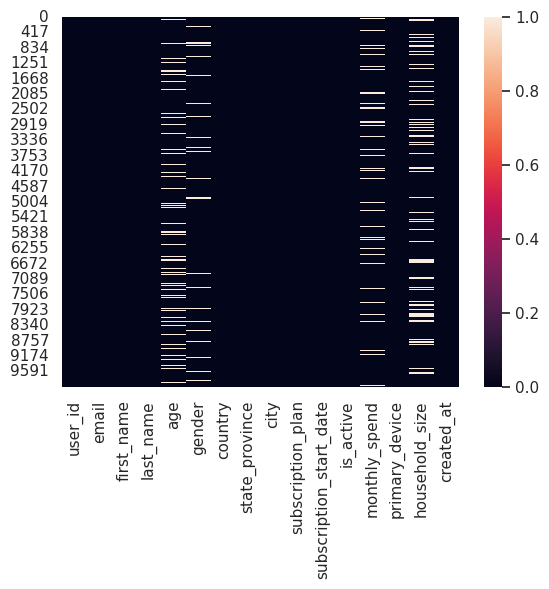

In [349]:
sns.heatmap(user.isnull())

<Axes: >

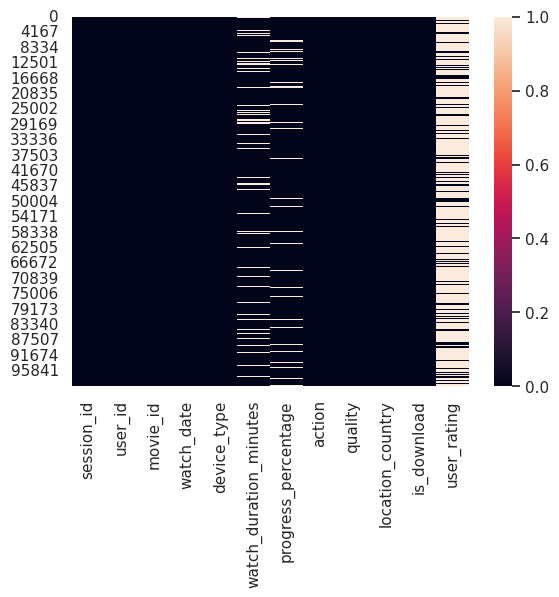

In [350]:
sns.heatmap(watch.isnull())

<Axes: >

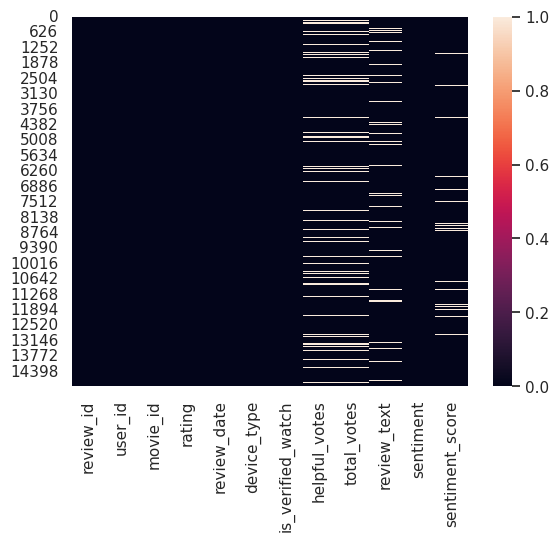

In [351]:
sns.heatmap(review.isnull())

In [352]:
movie.head()

,movie_id,title,content_type,genre_primary,genre_secondary,release_year,duration_minutes,rating,language,country_of_origin,imdb_rating,production_budget,box_office_revenue,number_of_seasons,number_of_episodes,is_netflix_original,added_to_platform,content_warning
0,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,NaN,NaN,NaN,NaN,NaN,False,2023-08-07,False
1,movie_0002,Storm Warrior,Stand-up Comedy,Sci-Fi,NaN,2017,37.0,PG,Japanese,USA,3.3,NaN,NaN,NaN,NaN,False,2022-01-28,True
2,movie_0003,Fire Family,Movie,Drama,NaN,2003,142.0,TV-MA,English,USA,8.5,2114120.0,NaN,NaN,NaN,False,2021-05-04,True
3,movie_0004,Our Princess,Documentary,Sci-Fi,NaN,2011,131.0,NC-17,Japanese,USA,5.3,NaN,NaN,NaN,NaN,False,2022-11-26,False
4,movie_0005,Warrior Mission,Documentary,Sport,Mystery,2015,91.0,TV-G,English,USA,3.1,NaN,NaN,NaN,NaN,False,2023-06-15,False


# Search or find method use to find movies

In [353]:
movie[movie["title"].isin(["Storm Warrior"])]

,movie_id,title,content_type,genre_primary,genre_secondary,release_year,duration_minutes,rating,language,country_of_origin,imdb_rating,production_budget,box_office_revenue,number_of_seasons,number_of_episodes,is_netflix_original,added_to_platform,content_warning
1,movie_0002,Storm Warrior,Stand-up Comedy,Sci-Fi,NaN,2017,37.0,PG,Japanese,USA,3.3,NaN,NaN,NaN,NaN,False,2022-01-28,True
71,movie_0072,Storm Warrior,Limited Series,Sci-Fi,Drama,2015,73.0,TV-14,French,South Korea,NaN,NaN,NaN,14.0,75.0,False,2021-06-09,False


# Types of content

In [354]:
movie.dtypes

movie_id                object
title                   object
content_type            object
genre_primary           object
genre_secondary         object
release_year             int64
duration_minutes       float64
rating                  object
language                object
country_of_origin       object
imdb_rating            float64
production_budget      float64
box_office_revenue     float64
number_of_seasons      float64
number_of_episodes     float64
is_netflix_original       bool
added_to_platform       object
content_warning           bool
dtype: object

In [355]:
movie['Datee'] = pd.to_datetime(movie['release_year'])

In [356]:
movie.head()

,movie_id,title,content_type,genre_primary,genre_secondary,release_year,duration_minutes,rating,language,country_of_origin,imdb_rating,production_budget,box_office_revenue,number_of_seasons,number_of_episodes,is_netflix_original,added_to_platform,content_warning,Datee
0,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,NaN,NaN,NaN,NaN,NaN,False,2023-08-07,False,1970-01-01 00:00:00.000002014
1,movie_0002,Storm Warrior,Stand-up Comedy,Sci-Fi,NaN,2017,37.0,PG,Japanese,USA,3.3,NaN,NaN,NaN,NaN,False,2022-01-28,True,1970-01-01 00:00:00.000002017
2,movie_0003,Fire Family,Movie,Drama,NaN,2003,142.0,TV-MA,English,USA,8.5,2114120.0,NaN,NaN,NaN,False,2021-05-04,True,1970-01-01 00:00:00.000002003
3,movie_0004,Our Princess,Documentary,Sci-Fi,NaN,2011,131.0,NC-17,Japanese,USA,5.3,NaN,NaN,NaN,NaN,False,2022-11-26,False,1970-01-01 00:00:00.000002011
4,movie_0005,Warrior Mission,Documentary,Sport,Mystery,2015,91.0,TV-G,English,USA,3.1,NaN,NaN,NaN,NaN,False,2023-06-15,False,1970-01-01 00:00:00.000002015


In [357]:
movie.dtypes

movie_id                       object
title                          object
content_type                   object
genre_primary                  object
genre_secondary                object
release_year                    int64
duration_minutes              float64
rating                         object
language                       object
country_of_origin              object
imdb_rating                   float64
production_budget             float64
box_office_revenue            float64
number_of_seasons             float64
number_of_episodes            float64
is_netflix_original              bool
added_to_platform              object
content_warning                  bool
Datee                  datetime64[ns]
dtype: object

In [358]:
movie.head()

,movie_id,title,content_type,genre_primary,genre_secondary,release_year,duration_minutes,rating,language,country_of_origin,imdb_rating,production_budget,box_office_revenue,number_of_seasons,number_of_episodes,is_netflix_original,added_to_platform,content_warning,Datee
0,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,NaN,NaN,NaN,NaN,NaN,False,2023-08-07,False,1970-01-01 00:00:00.000002014
1,movie_0002,Storm Warrior,Stand-up Comedy,Sci-Fi,NaN,2017,37.0,PG,Japanese,USA,3.3,NaN,NaN,NaN,NaN,False,2022-01-28,True,1970-01-01 00:00:00.000002017
2,movie_0003,Fire Family,Movie,Drama,NaN,2003,142.0,TV-MA,English,USA,8.5,2114120.0,NaN,NaN,NaN,False,2021-05-04,True,1970-01-01 00:00:00.000002003
3,movie_0004,Our Princess,Documentary,Sci-Fi,NaN,2011,131.0,NC-17,Japanese,USA,5.3,NaN,NaN,NaN,NaN,False,2022-11-26,False,1970-01-01 00:00:00.000002011
4,movie_0005,Warrior Mission,Documentary,Sport,Mystery,2015,91.0,TV-G,English,USA,3.1,NaN,NaN,NaN,NaN,False,2023-06-15,False,1970-01-01 00:00:00.000002015


# Used datetime method to convert  and new columns

In [359]:
movie['Datee'] = pd.to_datetime(movie['release_year'].astype(str), format='%Y')

In [360]:
movie['Datee'].dt.year.value_counts()

Datee
2018    40
1998    38
2020    36
2002    36
1997    35
2011    35
2003    34
1993    33
2024    32
1990    31
2015    31
2014    30
2022    30
1995    29
2001    29
2005    28
2023    28
2000    26
2006    26
2017    26
2013    26
1999    26
2012    25
1994    25
2008    25
2016    24
1992    24
2009    23
2004    23
2021    23
2010    22
1991    22
2007    22
1996    21
2019    20
1961     2
1966     2
1956     2
1984     1
1986     1
1973     1
1953     1
1954     1
1979     1
1981     1
1978     1
1963     1
1965     1
Name: count, dtype: int64

<Axes: xlabel='Datee'>

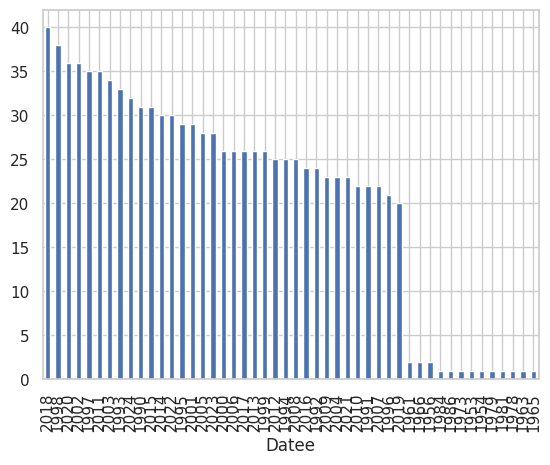

In [361]:
movie['Datee'].dt.year.value_counts().plot(kind= "bar")

In [362]:
year_counts= movie['Datee'].dt.year.value_counts().sort_index()

<module 'matplotlib.pyplot' from '/home/anni/anaconda3/envs/streamlit-env/lib/python3.10/site-packages/matplotlib/pyplot.py'>

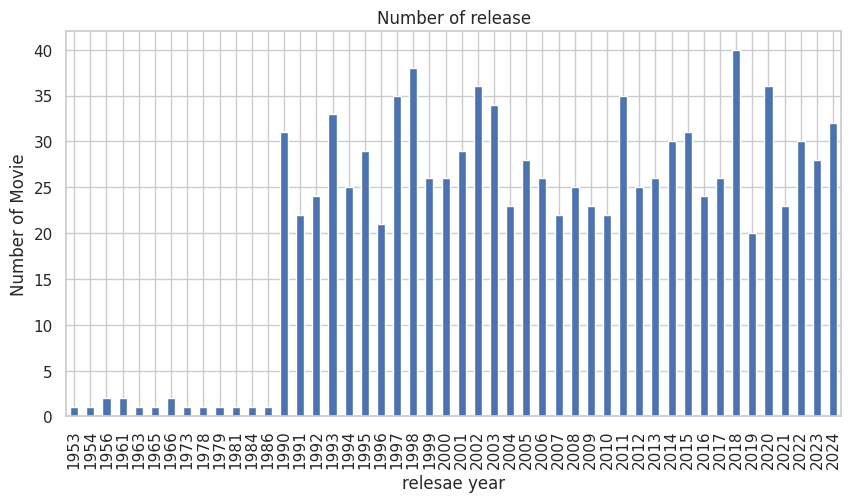

In [363]:
year_counts.plot(kind="bar", figsize=(10,5))
plt.xlabel('relesae year')
plt.ylabel('Number of Movie')
plt.title('Number of release')
plt

In [364]:
movie.head()

,movie_id,title,content_type,genre_primary,genre_secondary,release_year,duration_minutes,rating,language,country_of_origin,imdb_rating,production_budget,box_office_revenue,number_of_seasons,number_of_episodes,is_netflix_original,added_to_platform,content_warning,Datee
0,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,NaN,NaN,NaN,NaN,NaN,False,2023-08-07,False,2014-01-01
1,movie_0002,Storm Warrior,Stand-up Comedy,Sci-Fi,NaN,2017,37.0,PG,Japanese,USA,3.3,NaN,NaN,NaN,NaN,False,2022-01-28,True,2017-01-01
2,movie_0003,Fire Family,Movie,Drama,NaN,2003,142.0,TV-MA,English,USA,8.5,2114120.0,NaN,NaN,NaN,False,2021-05-04,True,2003-01-01
3,movie_0004,Our Princess,Documentary,Sci-Fi,NaN,2011,131.0,NC-17,Japanese,USA,5.3,NaN,NaN,NaN,NaN,False,2022-11-26,False,2011-01-01
4,movie_0005,Warrior Mission,Documentary,Sport,Mystery,2015,91.0,TV-G,English,USA,3.1,NaN,NaN,NaN,NaN,False,2023-06-15,False,2015-01-01


In [365]:
movie.groupby("content_type").content_type.count()

content_type
Documentary        136
Limited Series      51
Movie              444
Stand-up Comedy    115
TV Series          254
Name: content_type, dtype: int64

<Axes: xlabel='count', ylabel='content_type'>

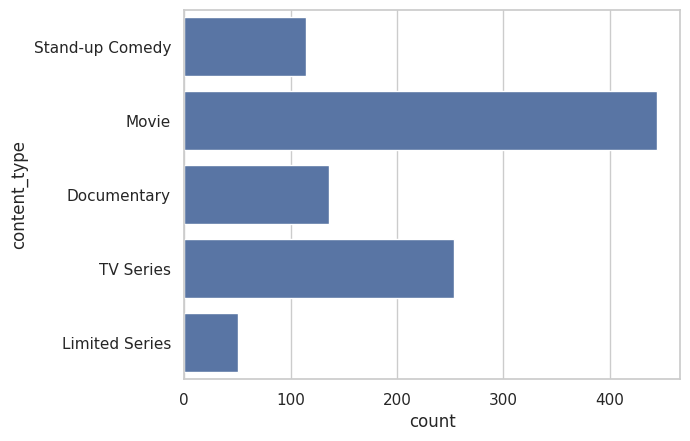

In [366]:
sns.countplot(movie['content_type'])

Text(0.5, 1.0, 'Number of Content_types')

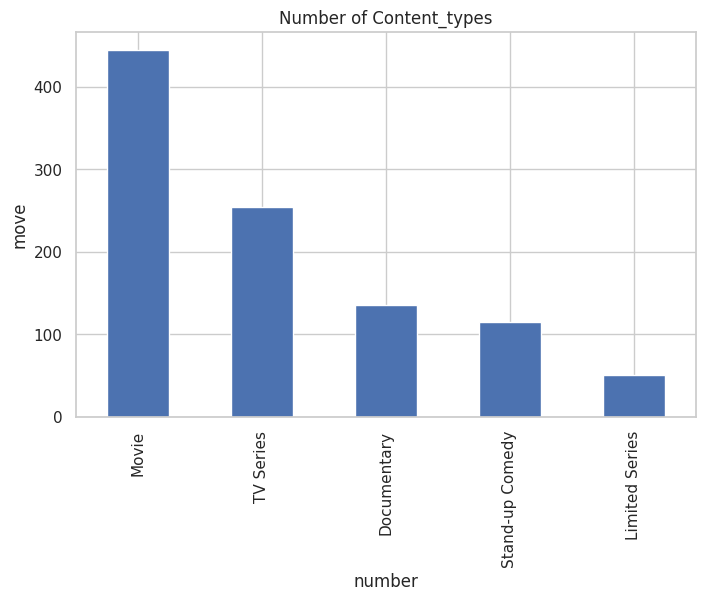

In [367]:
con=movie['content_type'].value_counts()
con.plot(kind='bar', figsize=(8,5))
plt.xlabel("number")
plt.ylabel("move")
plt.title("Number of Content_types")

In [368]:
movie.groupby("language").language.count()

language
English     585
French       65
German       40
Hindi        58
Italian      51
Japanese     53
Korean       49
Spanish      99
Name: language, dtype: int64

Text(0.5, 0, 'number')

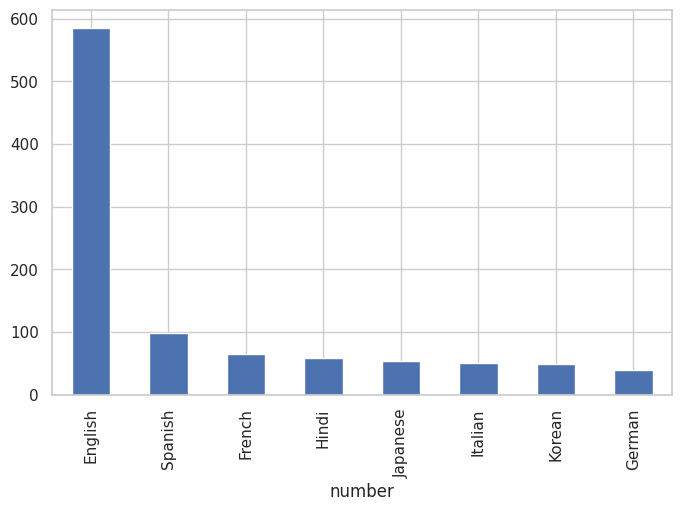

In [369]:
lan=movie['language'].value_counts()

lan.plot(kind='bar', figsize=(8,5))
plt.xlabel("number")

In [370]:
movie.head()

,movie_id,title,content_type,genre_primary,genre_secondary,release_year,duration_minutes,rating,language,country_of_origin,imdb_rating,production_budget,box_office_revenue,number_of_seasons,number_of_episodes,is_netflix_original,added_to_platform,content_warning,Datee
0,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,NaN,NaN,NaN,NaN,NaN,False,2023-08-07,False,2014-01-01
1,movie_0002,Storm Warrior,Stand-up Comedy,Sci-Fi,NaN,2017,37.0,PG,Japanese,USA,3.3,NaN,NaN,NaN,NaN,False,2022-01-28,True,2017-01-01
2,movie_0003,Fire Family,Movie,Drama,NaN,2003,142.0,TV-MA,English,USA,8.5,2114120.0,NaN,NaN,NaN,False,2021-05-04,True,2003-01-01
3,movie_0004,Our Princess,Documentary,Sci-Fi,NaN,2011,131.0,NC-17,Japanese,USA,5.3,NaN,NaN,NaN,NaN,False,2022-11-26,False,2011-01-01
4,movie_0005,Warrior Mission,Documentary,Sport,Mystery,2015,91.0,TV-G,English,USA,3.1,NaN,NaN,NaN,NaN,False,2023-06-15,False,2015-01-01


In [371]:
movie['country_of_origin'].value_counts()

country_of_origin
USA            526
South Korea    112
Canada          98
UK              83
Japan           54
Germany         47
France          43
India           37
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='country_of_origin'>

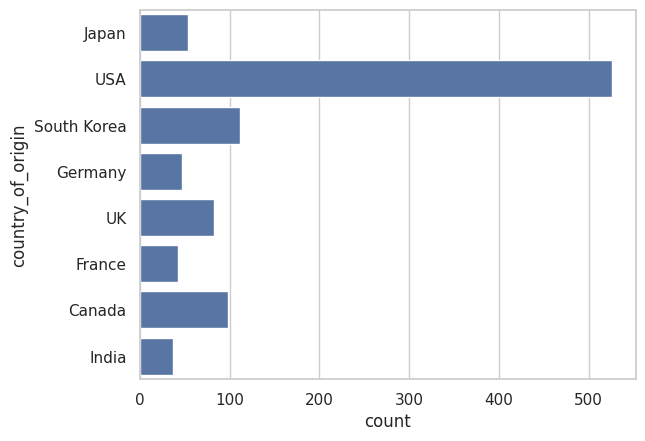

In [372]:
sns.countplot(movie['country_of_origin'])

In [373]:
movie.head()

,movie_id,title,content_type,genre_primary,genre_secondary,release_year,duration_minutes,rating,language,country_of_origin,imdb_rating,production_budget,box_office_revenue,number_of_seasons,number_of_episodes,is_netflix_original,added_to_platform,content_warning,Datee
0,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,NaN,NaN,NaN,NaN,NaN,False,2023-08-07,False,2014-01-01
1,movie_0002,Storm Warrior,Stand-up Comedy,Sci-Fi,NaN,2017,37.0,PG,Japanese,USA,3.3,NaN,NaN,NaN,NaN,False,2022-01-28,True,2017-01-01
2,movie_0003,Fire Family,Movie,Drama,NaN,2003,142.0,TV-MA,English,USA,8.5,2114120.0,NaN,NaN,NaN,False,2021-05-04,True,2003-01-01
3,movie_0004,Our Princess,Documentary,Sci-Fi,NaN,2011,131.0,NC-17,Japanese,USA,5.3,NaN,NaN,NaN,NaN,False,2022-11-26,False,2011-01-01
4,movie_0005,Warrior Mission,Documentary,Sport,Mystery,2015,91.0,TV-G,English,USA,3.1,NaN,NaN,NaN,NaN,False,2023-06-15,False,2015-01-01


In [374]:
movie.groupby('rating').size()

rating
G        93
NC-17    98
PG       96
PG-13    91
R        78
TV-14    97
TV-G     73
TV-MA    93
TV-PG    88
TV-Y     99
TV-Y7    94
dtype: int64

In [375]:
movie.groupby(['Datee', 'rating']).size()


Datee       rating
1953-01-01  TV-14     1
1954-01-01  TV-PG     1
1956-01-01  PG        1
            TV-Y7     1
1961-01-01  PG-13     1
                     ..
2024-01-01  TV-G      4
            TV-MA     2
            TV-PG     3
            TV-Y      3
            TV-Y7     6
Length: 368, dtype: int64

In [376]:
movie.loc[movie['release_year']==2020,['title','rating']]


,title,rating
20,Family Love,TV-PG
22,Mystery Night,TV-MA
41,First Hero,TV-G
57,Day Mystery,R
68,An Quest,NC-17
92,City Queen,R
173,City Battle,TV-Y7
180,Phoenix Hero,G
184,King Ice,TV-G
230,Storm Quest,TV-Y


In [377]:
m=movie['imdb_rating'].max()
h=movie[movie['imdb_rating']==m]
m
h

,movie_id,title,content_type,genre_primary,genre_secondary,release_year,duration_minutes,rating,language,country_of_origin,imdb_rating,production_budget,box_office_revenue,number_of_seasons,number_of_episodes,is_netflix_original,added_to_platform,content_warning,Datee
156,movie_0157,Last Ice,Documentary,Sport,NaN,2001,77.0,R,German,USA,10.0,NaN,NaN,NaN,NaN,False,2022-02-15,False,2001-01-01
171,movie_0172,My Story,Movie,Horror,NaN,1993,94.0,TV-Y,Spanish,USA,10.0,5064920.0,11553135.0,NaN,NaN,False,2023-09-10,False,1993-01-01
306,movie_0307,Dark Ice,Stand-up Comedy,Crime,NaN,2023,48.0,TV-Y,Italian,India,10.0,NaN,NaN,NaN,NaN,False,2024-03-02,False,2023-01-01
449,movie_0450,A Quest,Stand-up Comedy,Action,NaN,2005,57.0,NC-17,English,USA,10.0,NaN,NaN,NaN,NaN,False,2025-05-13,True,2005-01-01
530,movie_0531,Last Night,Movie,Western,Biography,2000,106.0,PG,English,Japan,10.0,NaN,136292673.0,NaN,NaN,False,2025-04-01,False,2000-01-01
640,movie_0641,First Dream,TV Series,Thriller,Thriller,2023,62.0,R,English,USA,10.0,NaN,NaN,12.0,54.0,True,2025-01-29,False,2023-01-01
651,movie_0652,Our Night,Movie,History,NaN,2015,102.0,TV-MA,English,USA,10.0,14939487.0,21771252.0,NaN,NaN,False,2024-10-15,True,2015-01-01
779,movie_0780,Dream Warrior,Movie,Romance,Action,1998,93.0,TV-Y,Spanish,USA,10.0,1359172.0,2925013.0,NaN,NaN,False,2022-07-09,False,1998-01-01
829,movie_0830,Storm Mystery,Movie,Comedy,NaN,2019,144.0,TV-MA,French,USA,10.0,29920808.0,476337.0,NaN,NaN,False,2023-09-25,False,2019-01-01
919,movie_0920,Story Warrior,Movie,Music,NaN,1998,129.0,R,English,Canada,10.0,1568923.0,910439.0,NaN,NaN,False,2021-07-11,False,1998-01-01


In [378]:
movie.groupby('Datee')[['imdb_rating','title']].max()

,imdb_rating,title
Datee,,
1953-01-01,4.0,Fire Night
1954-01-01,6.4,Phoenix Adventure
1956-01-01,8.1,Last Hero
1961-01-01,7.5,City Empire
1963-01-01,7.7,Empire Kingdom
1965-01-01,6.5,War Empire
1966-01-01,8.0,War Battle
1973-01-01,NaN,Quest Hero
1978-01-01,7.0,Last Story


In [379]:
user.head()

,user_id,email,first_name,last_name,age,gender,country,state_province,city,subscription_plan,subscription_start_date,is_active,monthly_spend,primary_device,household_size,created_at
0,user_00001,figueroajohn@example.org,Erica,Garza,43.0,Male,USA,Massachusetts,North Jefferyhaven,Basic,2024-04-08,True,36.06,Laptop,1.0,2023-04-01 14:40:50.540242
1,user_00002,blakeerik@example.com,Joshua,Bernard,38.0,Male,USA,Texas,North Noahstad,Premium+,2024-05-24,True,14.59,Desktop,2.0,2024-10-10 15:39:11.030515
2,user_00003,smiller@example.net,Barbara,Williams,32.0,Female,USA,Michigan,Traciebury,Standard,2023-09-22,False,11.71,Desktop,3.0,2024-06-29 14:27:49.560875
3,user_00004,mitchellclark@example.com,Chelsea,Ferguson,11.0,Male,USA,Ohio,South Noah,Standard,2024-08-21,True,28.56,Laptop,2.0,2023-04-11 01:01:59.614841
4,user_00005,richard13@example.net,Jason,Foster,21.0,Female,USA,Arizona,West Donald,Standard,2024-10-28,True,9.54,Desktop,6.0,2025-04-12 19:59:30.137806


In [380]:
print(movie.columns)
print(user.columns)
print(watch.columns)
print(review.columns)


Index(['movie_id', 'title', 'content_type', 'genre_primary', 'genre_secondary',
       'release_year', 'duration_minutes', 'rating', 'language',
       'country_of_origin', 'imdb_rating', 'production_budget',
       'box_office_revenue', 'number_of_seasons', 'number_of_episodes',
       'is_netflix_original', 'added_to_platform', 'content_warning', 'Datee'],
      dtype='object')
Index(['user_id', 'email', 'first_name', 'last_name', 'age', 'gender',
       'country', 'state_province', 'city', 'subscription_plan',
       'subscription_start_date', 'is_active', 'monthly_spend',
       'primary_device', 'household_size', 'created_at'],
      dtype='object')
Index(['session_id', 'user_id', 'movie_id', 'watch_date', 'device_type',
       'watch_duration_minutes', 'progress_percentage', 'action', 'quality',
       'location_country', 'is_download', 'user_rating'],
      dtype='object')
Index(['review_id', 'user_id', 'movie_id', 'rating', 'review_date',
       'device_type', 'is_verified_watc

# Used Join Function  to merge database

In [381]:
a=pd.merge(movie,review ,on='movie_id', how = "inner")
a

,movie_id,title,content_type,genre_primary,genre_secondary,release_year,duration_minutes,rating_x,language,country_of_origin,...,user_id,rating_y,review_date,device_type,is_verified_watch,helpful_votes,total_votes,review_text,sentiment,sentiment_score
0,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,...,user_07093,5,2024-07-02,Smart TV,True,NaN,NaN,Fantastic cinematography and plot twists.,positive,0.899
1,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,...,user_06372,3,2024-06-20,Smart TV,False,5.0,6.0,Average movie. Some good moments.,neutral,0.498
2,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,...,user_00968,2,2024-10-23,Tablet,True,4.0,4.0,Slow paced and boring.,negative,0.001
3,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,...,user_05750,4,2024-08-25,Mobile,True,3.0,3.0,Brilliant performance by the cast. Must watch!,positive,0.846
4,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,...,user_09632,5,2025-06-29,Laptop,True,2.0,5.0,Fantastic cinematography and plot twists.,positive,0.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,movie_1000,Last Night,TV Series,Sport,NaN,1993,42.0,NC-17,English,UK,...,user_01633,3,2024-09-04,Smart TV,True,3.0,5.0,Okay for a one-time watch.,neutral,0.503
14996,movie_1000,Last Night,TV Series,Sport,NaN,1993,42.0,NC-17,English,UK,...,user_04488,4,2024-07-08,Laptop,True,3.0,4.0,Amazing show! Couldn't stop watching.,positive,0.875
14997,movie_1000,Last Night,TV Series,Sport,NaN,1993,42.0,NC-17,English,UK,...,user_01177,4,2025-02-23,Smart TV,True,NaN,NaN,This series is a masterpiece!,positive,0.890
14998,movie_1000,Last Night,TV Series,Sport,NaN,1993,42.0,NC-17,English,UK,...,user_04352,2,2024-06-19,Laptop,True,3.0,3.0,Not worth the time. Very predictable.,negative,0.109


In [382]:
watch.head(2)

,session_id,user_id,movie_id,watch_date,device_type,watch_duration_minutes,progress_percentage,action,quality,location_country,is_download,user_rating
0,session_000001,user_07271,movie_0511,2025-11-13,Tablet,63.9,34.6,completed,HD,USA,False,NaN
1,session_000002,user_00861,movie_0588,2025-02-26,Laptop,120.1,44.2,started,HD,USA,False,NaN


In [383]:
m=pd.merge(a,watch, on= 'movie_id', how= 'inner')
m

,movie_id,title,content_type,genre_primary,genre_secondary,release_year,duration_minutes,rating_x,language,country_of_origin,...,user_id_y,watch_date,device_type_y,watch_duration_minutes,progress_percentage,action,quality,location_country,is_download,user_rating
0,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,...,user_07824,2025-12-04,Smart TV,61.3,25.7,paused,HD,USA,False,NaN
1,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,...,user_02793,2024-03-01,Smart TV,84.2,6.9,started,4K,Canada,False,NaN
2,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,...,user_05163,2025-02-25,Mobile,31.9,95.7,stopped,Ultra HD,Canada,True,NaN
3,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,...,user_09142,2024-07-25,Mobile,21.1,48.2,stopped,SD,Canada,False,NaN
4,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,...,user_01372,2025-12-02,Mobile,68.3,47.8,started,4K,USA,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499581,movie_1000,Last Night,TV Series,Sport,NaN,1993,42.0,NC-17,English,UK,...,user_01567,2025-07-16,Mobile,36.3,45.2,started,HD,USA,False,4.0
1499582,movie_1000,Last Night,TV Series,Sport,NaN,1993,42.0,NC-17,English,UK,...,user_03233,2024-03-30,Desktop,NaN,7.9,completed,HD,USA,True,NaN
1499583,movie_1000,Last Night,TV Series,Sport,NaN,1993,42.0,NC-17,English,UK,...,user_04500,2025-01-01,Desktop,116.4,46.3,paused,4K,Canada,False,NaN
1499584,movie_1000,Last Night,TV Series,Sport,NaN,1993,42.0,NC-17,English,UK,...,user_02704,2025-10-25,Desktop,57.3,39.1,started,HD,Canada,False,NaN


In [384]:
a.columns


Index(['movie_id', 'title', 'content_type', 'genre_primary', 'genre_secondary',
       'release_year', 'duration_minutes', 'rating_x', 'language',
       'country_of_origin', 'imdb_rating', 'production_budget',
       'box_office_revenue', 'number_of_seasons', 'number_of_episodes',
       'is_netflix_original', 'added_to_platform', 'content_warning', 'Datee',
       'review_id', 'user_id', 'rating_y', 'review_date', 'device_type',
       'is_verified_watch', 'helpful_votes', 'total_votes', 'review_text',
       'sentiment', 'sentiment_score'],
      dtype='object')

In [385]:
m.columns

Index(['movie_id', 'title', 'content_type', 'genre_primary', 'genre_secondary',
       'release_year', 'duration_minutes', 'rating_x', 'language',
       'country_of_origin', 'imdb_rating', 'production_budget',
       'box_office_revenue', 'number_of_seasons', 'number_of_episodes',
       'is_netflix_original', 'added_to_platform', 'content_warning', 'Datee',
       'review_id', 'user_id_x', 'rating_y', 'review_date', 'device_type_x',
       'is_verified_watch', 'helpful_votes', 'total_votes', 'review_text',
       'sentiment', 'sentiment_score', 'session_id', 'user_id_y', 'watch_date',
       'device_type_y', 'watch_duration_minutes', 'progress_percentage',
       'action', 'quality', 'location_country', 'is_download', 'user_rating'],
      dtype='object')

In [386]:
m.groupby('language')['location_country'].size()

language
English     881813
French       98740
German       58437
Hindi        88681
Italian      74788
Japanese     78231
Korean       73470
Spanish     145426
Name: location_country, dtype: int64

<module 'matplotlib.pyplot' from '/home/anni/anaconda3/envs/streamlit-env/lib/python3.10/site-packages/matplotlib/pyplot.py'>

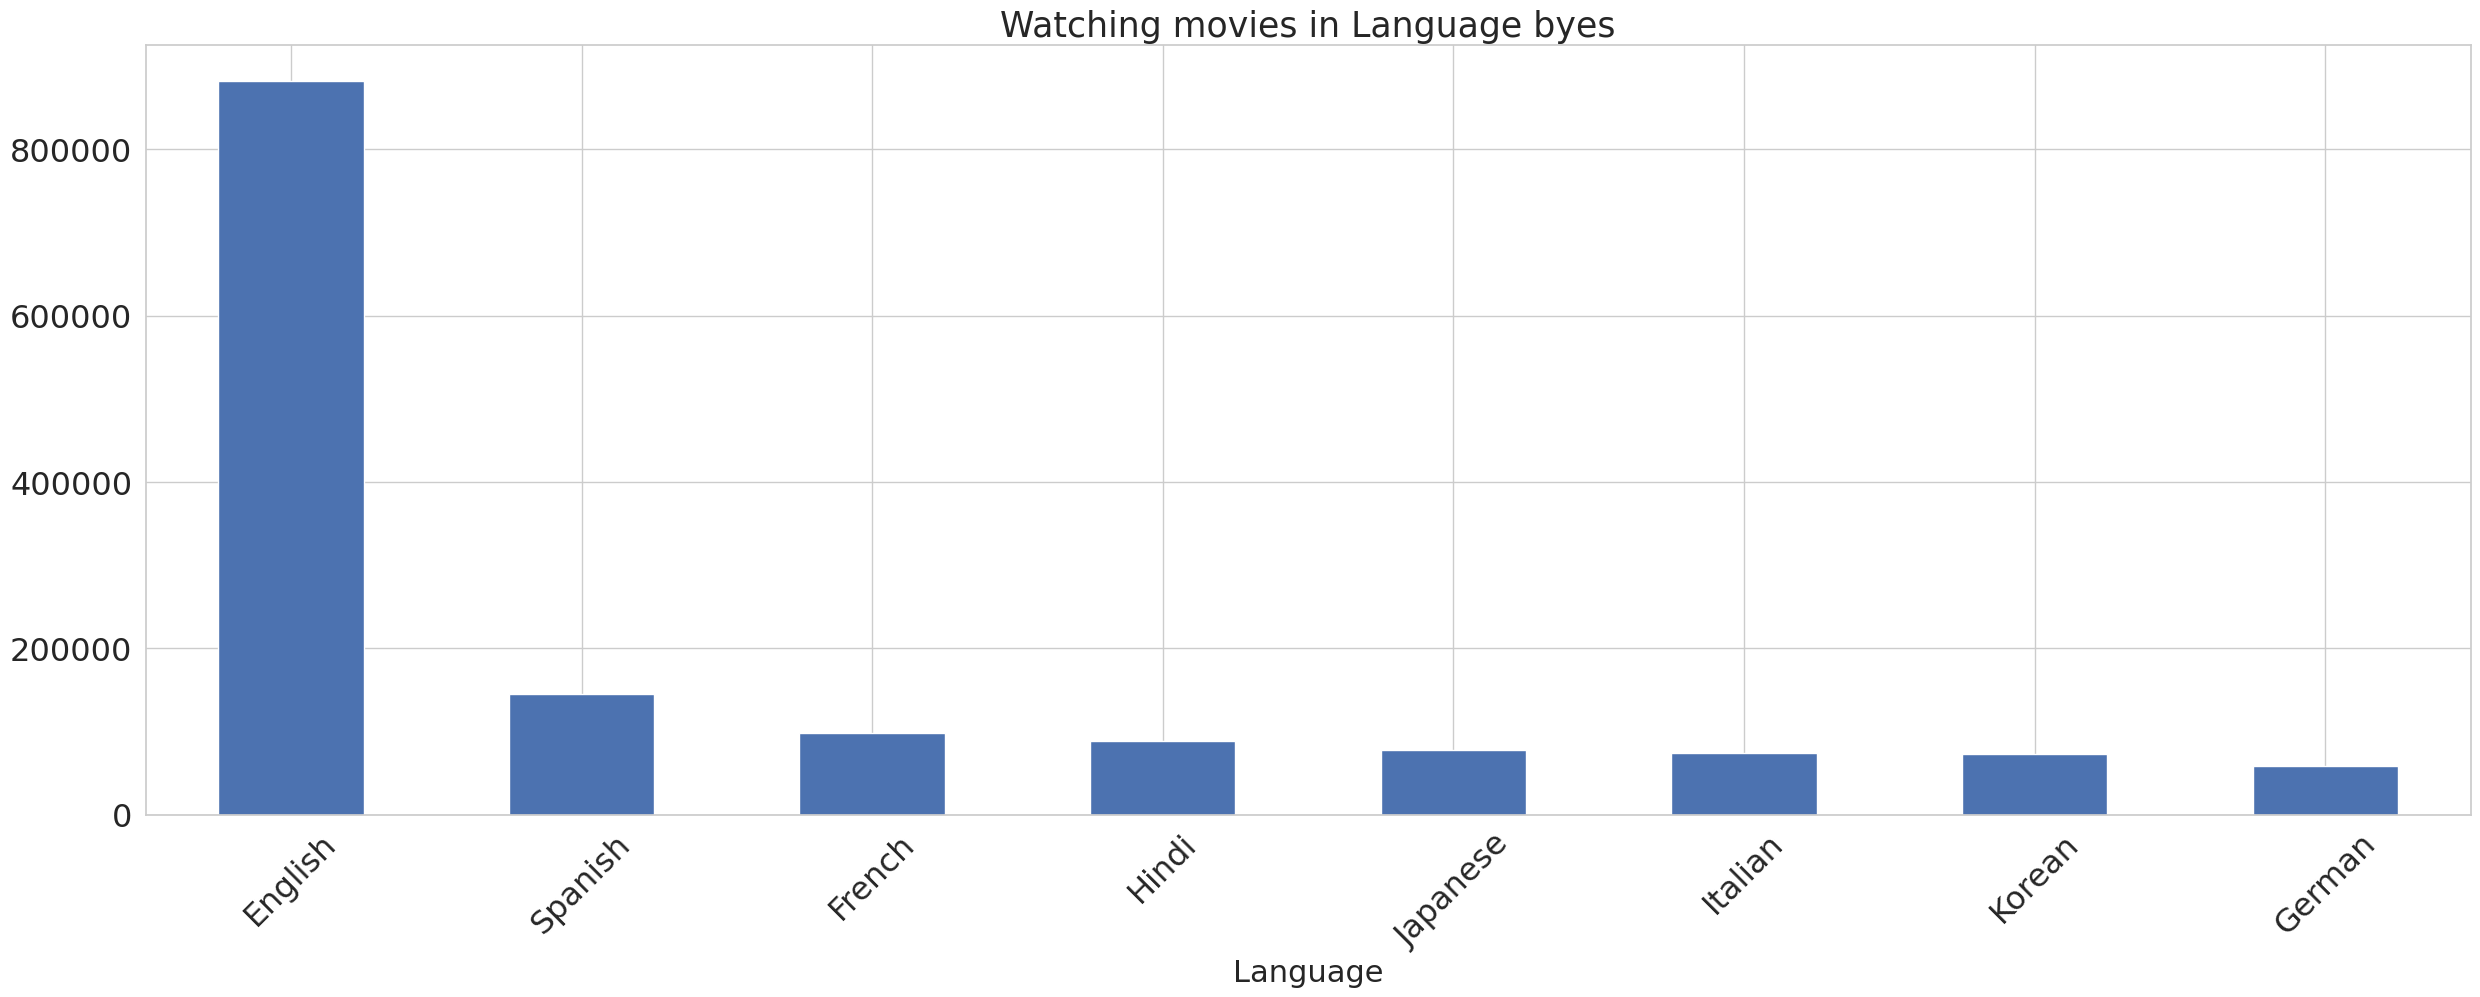

In [387]:
l=m['language'].value_counts()

l.plot (kind= "bar",fontsize=23,figsize=(30,10))
plt.xlabel("Language",fontsize=22)
plt.title("Watching movies in Language byes",fontsize=(25))
plt.xticks(rotation=45)
plt

In [388]:
m.head()

,movie_id,title,content_type,genre_primary,genre_secondary,release_year,duration_minutes,rating_x,language,country_of_origin,...,user_id_y,watch_date,device_type_y,watch_duration_minutes,progress_percentage,action,quality,location_country,is_download,user_rating
0,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,...,user_07824,2025-12-04,Smart TV,61.3,25.7,paused,HD,USA,False,NaN
1,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,...,user_02793,2024-03-01,Smart TV,84.2,6.9,started,4K,Canada,False,NaN
2,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,...,user_05163,2025-02-25,Mobile,31.9,95.7,stopped,Ultra HD,Canada,True,NaN
3,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,...,user_09142,2024-07-25,Mobile,21.1,48.2,stopped,SD,Canada,False,NaN
4,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,...,user_01372,2025-12-02,Mobile,68.3,47.8,started,4K,USA,True,NaN


# Find Language byes Country Release Movies

In [389]:
m.groupby('language')['country_of_origin'].value_counts()

language  country_of_origin
English   USA                  473095
          Canada                95657
          South Korea           80631
          UK                    68753
          Germany               48227
                                ...  
Spanish   Germany                7108
          France                 6872
          UK                     6852
          Japan                  6295
          India                  2271
Name: count, Length: 61, dtype: int64

<Axes: xlabel='count', ylabel='country_of_origin'>

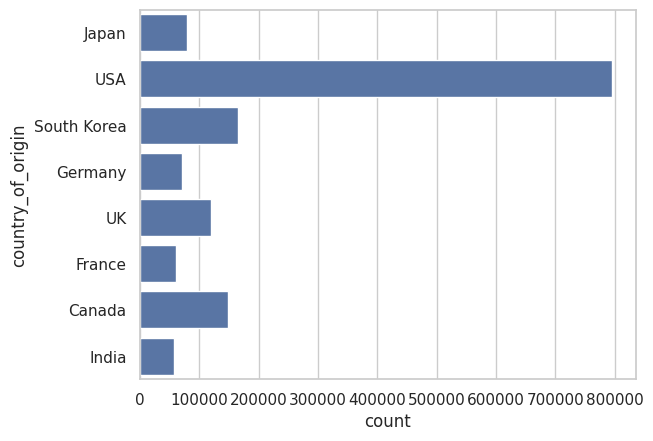

In [390]:
sns.countplot(m['country_of_origin'])

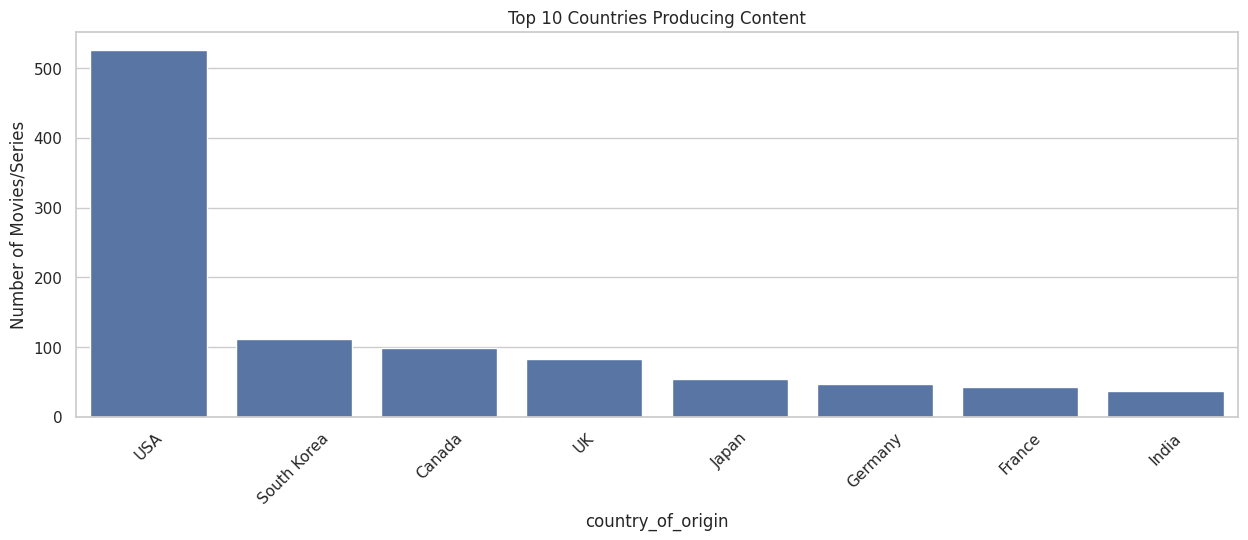

In [391]:
plt.figure(figsize=(15,5))
top_countries = movie['country_of_origin'].value_counts().nlargest(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 10 Countries Producing Content")
plt.xticks(rotation=45)
plt.ylabel("Number of Movies/Series")
plt.show()

In [392]:
(movie['Datee'] == 2020).sum()

np.int64(0)

In [393]:
movie[movie['Datee'] == 2021].shape[0]


0

In [394]:
movie.head()

,movie_id,title,content_type,genre_primary,genre_secondary,release_year,duration_minutes,rating,language,country_of_origin,imdb_rating,production_budget,box_office_revenue,number_of_seasons,number_of_episodes,is_netflix_original,added_to_platform,content_warning,Datee
0,movie_0001,Dragon Legend,Stand-up Comedy,History,Thriller,2014,35.0,TV-Y,French,Japan,NaN,NaN,NaN,NaN,NaN,False,2023-08-07,False,2014-01-01
1,movie_0002,Storm Warrior,Stand-up Comedy,Sci-Fi,NaN,2017,37.0,PG,Japanese,USA,3.3,NaN,NaN,NaN,NaN,False,2022-01-28,True,2017-01-01
2,movie_0003,Fire Family,Movie,Drama,NaN,2003,142.0,TV-MA,English,USA,8.5,2114120.0,NaN,NaN,NaN,False,2021-05-04,True,2003-01-01
3,movie_0004,Our Princess,Documentary,Sci-Fi,NaN,2011,131.0,NC-17,Japanese,USA,5.3,NaN,NaN,NaN,NaN,False,2022-11-26,False,2011-01-01
4,movie_0005,Warrior Mission,Documentary,Sport,Mystery,2015,91.0,TV-G,English,USA,3.1,NaN,NaN,NaN,NaN,False,2023-06-15,False,2015-01-01


In [395]:
movie.loc[movie['release_year'] == 2020].shape[0]

36

In [396]:
movie[(movie['genre_primary']== 'Drama') & (movie['release_year']==2020)]

,movie_id,title,content_type,genre_primary,genre_secondary,release_year,duration_minutes,rating,language,country_of_origin,imdb_rating,production_budget,box_office_revenue,number_of_seasons,number_of_episodes,is_netflix_original,added_to_platform,content_warning,Datee
57,movie_0058,Day Mystery,Stand-up Comedy,Drama,NaN,2020,57.0,R,English,USA,6.6,NaN,NaN,NaN,NaN,True,2022-10-16,False,2020-01-01


In [397]:
movie[(movie['release_year'] == 2020) & (movie['content_type'] == "TV Series")]


,movie_id,title,content_type,genre_primary,genre_secondary,release_year,duration_minutes,rating,language,country_of_origin,imdb_rating,production_budget,box_office_revenue,number_of_seasons,number_of_episodes,is_netflix_original,added_to_platform,content_warning,Datee
22,movie_0023,Mystery Night,TV Series,Adventure,NaN,2020,60.0,TV-MA,English,USA,4.8,NaN,NaN,6.0,197.0,True,2024-10-18,False,2020-01-01
68,movie_0069,An Quest,TV Series,Documentary,NaN,2020,42.0,NC-17,Spanish,South Korea,8.1,NaN,NaN,9.0,6.0,False,2024-02-13,False,2020-01-01
173,movie_0174,City Battle,TV Series,Thriller,NaN,2020,50.0,TV-Y7,Spanish,France,NaN,NaN,NaN,7.0,78.0,False,2023-11-06,False,2020-01-01
180,movie_0181,Phoenix Hero,TV Series,Crime,NaN,2020,43.0,G,English,UK,7.4,NaN,NaN,4.0,134.0,False,2023-09-22,False,2020-01-01
912,movie_0913,Empire Secret,TV Series,Crime,Sport,2020,29.0,TV-G,Japanese,UK,7.8,NaN,NaN,2.0,70.0,True,2024-04-25,False,2020-01-01
950,movie_0951,Big House,TV Series,Horror,NaN,2020,38.0,G,English,USA,6.7,NaN,NaN,6.0,72.0,True,2020-09-20,False,2020-01-01


# Finding Content_types

In [398]:
movie[(movie['release_year']==2020) & (movie['content_type']=="TV Series")]

,movie_id,title,content_type,genre_primary,genre_secondary,release_year,duration_minutes,rating,language,country_of_origin,imdb_rating,production_budget,box_office_revenue,number_of_seasons,number_of_episodes,is_netflix_original,added_to_platform,content_warning,Datee
22,movie_0023,Mystery Night,TV Series,Adventure,NaN,2020,60.0,TV-MA,English,USA,4.8,NaN,NaN,6.0,197.0,True,2024-10-18,False,2020-01-01
68,movie_0069,An Quest,TV Series,Documentary,NaN,2020,42.0,NC-17,Spanish,South Korea,8.1,NaN,NaN,9.0,6.0,False,2024-02-13,False,2020-01-01
173,movie_0174,City Battle,TV Series,Thriller,NaN,2020,50.0,TV-Y7,Spanish,France,NaN,NaN,NaN,7.0,78.0,False,2023-11-06,False,2020-01-01
180,movie_0181,Phoenix Hero,TV Series,Crime,NaN,2020,43.0,G,English,UK,7.4,NaN,NaN,4.0,134.0,False,2023-09-22,False,2020-01-01
912,movie_0913,Empire Secret,TV Series,Crime,Sport,2020,29.0,TV-G,Japanese,UK,7.8,NaN,NaN,2.0,70.0,True,2024-04-25,False,2020-01-01
950,movie_0951,Big House,TV Series,Horror,NaN,2020,38.0,G,English,USA,6.7,NaN,NaN,6.0,72.0,True,2020-09-20,False,2020-01-01


In [399]:
movie.columns

Index(['movie_id', 'title', 'content_type', 'genre_primary', 'genre_secondary',
       'release_year', 'duration_minutes', 'rating', 'language',
       'country_of_origin', 'imdb_rating', 'production_budget',
       'box_office_revenue', 'number_of_seasons', 'number_of_episodes',
       'is_netflix_original', 'added_to_platform', 'content_warning', 'Datee'],
      dtype='object')

In [400]:
movie['release_year'].value_counts().sort_index()

release_year
1953     1
1954     1
1956     2
1961     2
1963     1
1965     1
1966     2
1973     1
1978     1
1979     1
1981     1
1984     1
1986     1
1990    31
1991    22
1992    24
1993    33
1994    25
1995    29
1996    21
1997    35
1998    38
1999    26
2000    26
2001    29
2002    36
2003    34
2004    23
2005    28
2006    26
2007    22
2008    25
2009    23
2010    22
2011    35
2012    25
2013    26
2014    30
2015    31
2016    24
2017    26
2018    40
2019    20
2020    36
2021    23
2022    30
2023    28
2024    32
Name: count, dtype: int64

In [401]:
movie['release_year'].value_counts().idxmax()

np.int64(2018)

In [402]:
year_counts = movie['release_year'].value_counts()
most_year = year_counts.idxmax()
most_count = year_counts.max()

print(f"The year with the most releases is {most_year} with {most_count} movies.")


The year with the most releases is 2018 with 40 movies.


In [403]:
movies_yr = movie.groupby('release_year')['title'].apply(list)
movies_yr


release_year
1953                                         [Fire Night]
1954                                  [Phoenix Adventure]
1956                             [Last Hero, Dark Legend]
1961                            [City Empire, Big Empire]
1963                                     [Empire Kingdom]
1965                                         [War Empire]
1966                            [Last Dragon, War Battle]
1973                                         [Quest Hero]
1978                                         [Last Story]
1979                                         [Ice Legend]
1981                                        [Mystery War]
1984                                       [Legend House]
1986                                      [Quest Mystery]
1990    [Little War, Fire Mystery, Journey Love, Secre...
1991    [Old House, Day Queen, Story Kingdom, Dragon N...
1992    [Night Secret, Adventure House, A Love, Family...
1993    [A Empire, Night Warrior, Dragon Ice, Dark Cit...
1

In [404]:
yr = movie['release_year'].value_counts()
mx = yr.idxmax()
count = yr.max()

print(f"The year with the most movie releases is {mx} with {count} movies.")


The year with the most movie releases is 2018 with 40 movies.


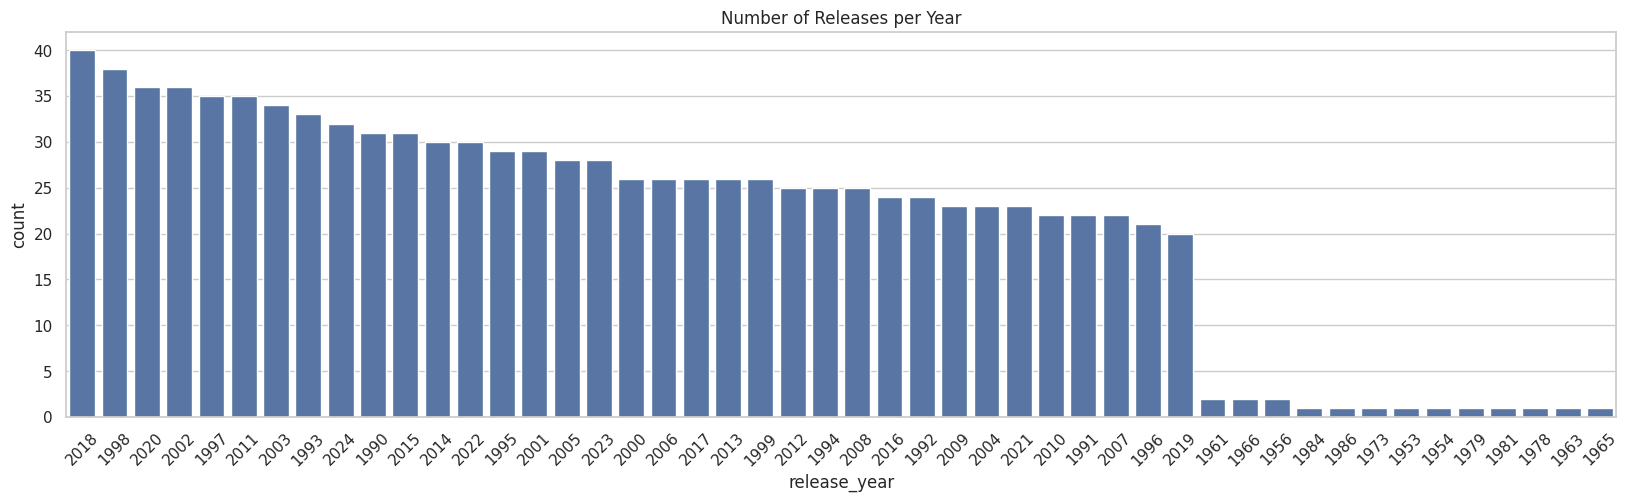

In [405]:
plt.figure(figsize=(20,5))
sns.countplot(data=movie, x="release_year", order=movie['release_year'].value_counts().index)
plt.title("Number of Releases per Year")
plt.xticks(rotation=45)
plt.show()

In [406]:
org=movie['is_netflix_original'].value_counts()
a=org.idxmax()
ct=org.max
org

is_netflix_original
False    694
True     306
Name: count, dtype: int64

In [407]:
movie.loc[movie['is_netflix_original'] == True, 'title']


10            Day Dream
13           Little War
16       Kingdom Battle
17     Princess Phoenix
21        First Mystery
             ...       
972        Dark Kingdom
977          City Night
980        First Dragon
987      Little Journey
997          Day Legend
Name: title, Length: 306, dtype: object

In [408]:
movie['imdb_rating'].describe()


count    856.000000
mean       6.281425
std        1.801823
min        0.500000
25%        5.300000
50%        6.400000
75%        7.500000
max       10.000000
Name: imdb_rating, dtype: float64

# Types of movie and these Genre

In [409]:
movie['genre_primary'].value_counts()

genre_primary
Adventure      68
Comedy         59
Animation      58
Sci-Fi         57
Action         57
War            57
Western        54
History        52
Romance        51
Documentary    50
Biography      50
Crime          48
Fantasy        47
Horror         46
Family         45
Drama          44
Music          44
Mystery        39
Sport          37
Thriller       37
Name: count, dtype: int64

# Types of Content

In [410]:
movie['content_type'].value_counts()


content_type
Movie              444
TV Series          254
Documentary        136
Stand-up Comedy    115
Limited Series      51
Name: count, dtype: int64

# Monthly Byes release Movies

In [411]:
movie.groupby(pd.to_datetime(movie['Datee']).dt.month)['title'].count()

Datee
1    1000
Name: title, dtype: int64

# Release year Byes Movies and content_types

In [412]:
movie.groupby(['release_year', 'content_type']).size().unstack(fill_value=0)

content_type,Documentary,Limited Series,Movie,Stand-up Comedy,TV Series
release_year,,,,,
1953,0,0,0,0,1
1954,0,0,0,1,0
1956,0,0,2,0,0
1961,0,0,1,1,0
1963,0,0,1,0,0
1965,0,0,0,0,1
1966,0,0,0,1,1
1973,0,0,1,0,0
1978,0,0,1,0,0


In [413]:
movie.groupby('genre_primary')['imdb_rating'].mean().sort_values(ascending=False)


genre_primary
Drama          6.734211
Fantasy        6.502439
Music          6.500000
Thriller       6.483871
Crime          6.411905
Adventure      6.403226
Horror         6.360465
Western        6.338298
Sci-Fi         6.322222
Animation      6.298077
Comedy         6.250000
War            6.172000
Family         6.161111
Sport          6.158621
Biography      6.144186
Documentary    6.140909
History        6.118750
Mystery        6.108824
Romance        6.062791
Action         6.036170
Name: imdb_rating, dtype: float64

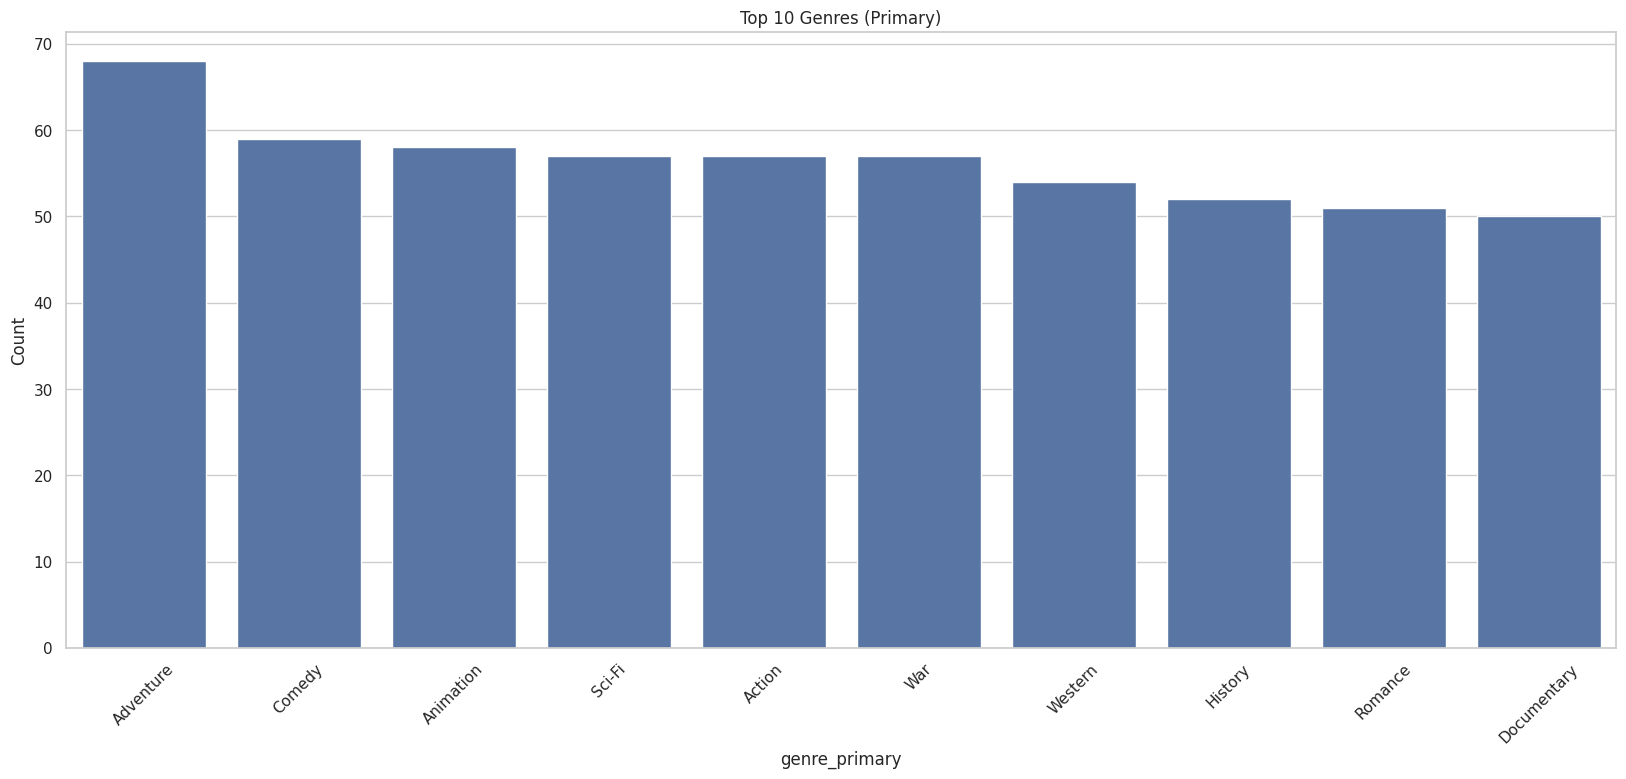

In [414]:
plt.figure(figsize=(20,8))
top_genres = movie['genre_primary'].value_counts().nlargest(10)
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title("Top 10 Genres (Primary)")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

# countery byes Rating

In [415]:
movie.groupby('country_of_origin')['imdb_rating'].mean().sort_values(ascending=False)


country_of_origin
France         6.715000
Japan          6.644681
India          6.490909
South Korea    6.430769
UK             6.294030
Germany        6.197436
Canada         6.193103
USA            6.182301
Name: imdb_rating, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

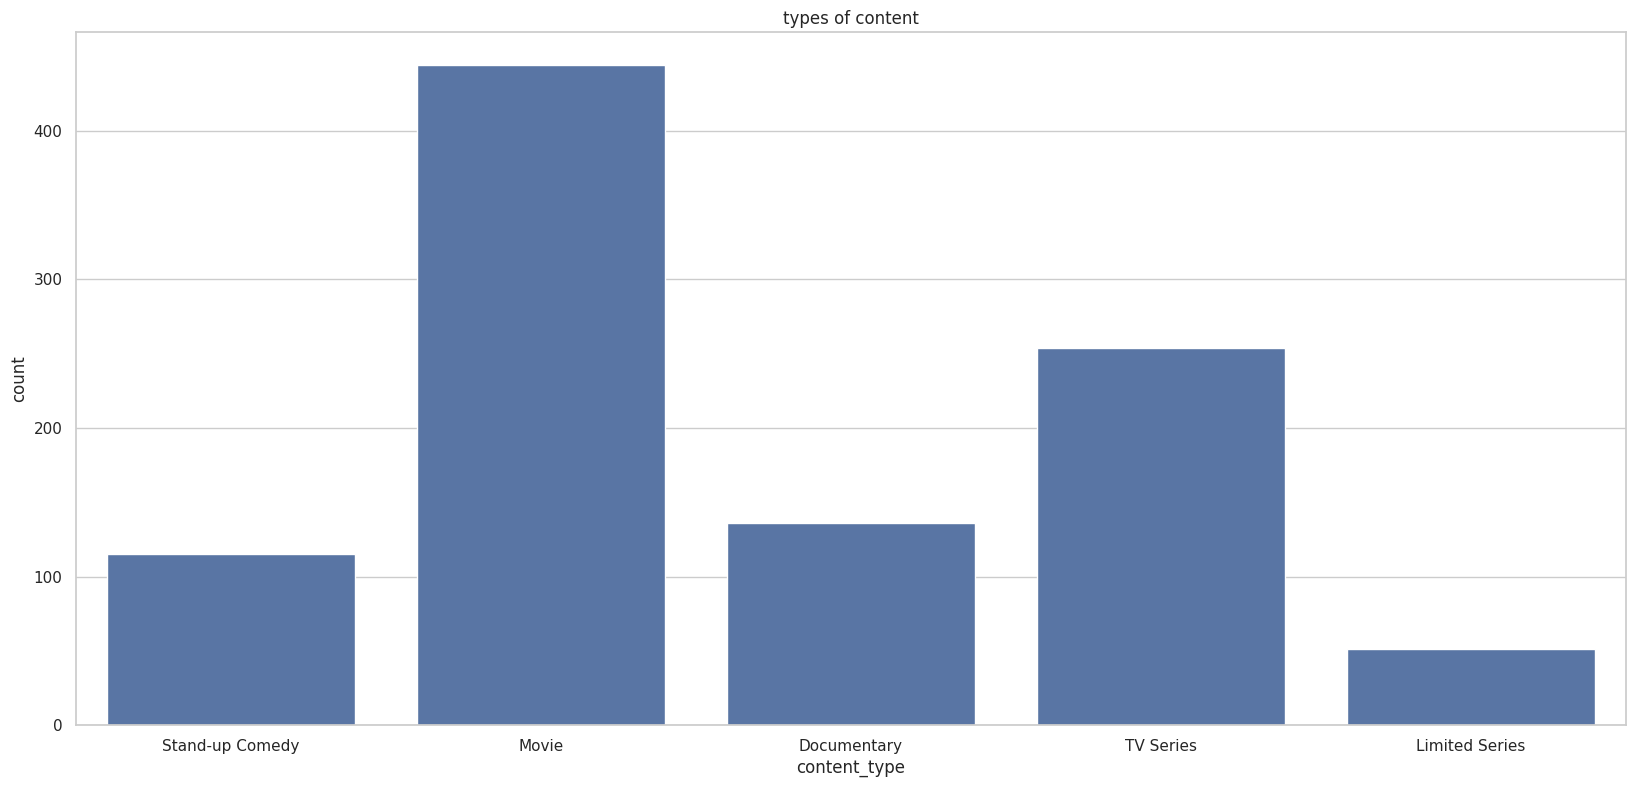

In [416]:
plt.figure(figsize=(20,9))
sns.countplot(data=movie,x="content_type")
plt.title("types of content")
plt.show


# Top 10 Movies in IMDB rating

In [417]:
movie.sort_values(by='imdb_rating',ascending=False).head(10)[['title',"imdb_rating"]]

,title,imdb_rating
530,Last Night,10.0
640,First Dream,10.0
651,Our Night,10.0
449,A Quest,10.0
779,Dream Warrior,10.0
919,Story Warrior,10.0
829,Storm Mystery,10.0
306,Dark Ice,10.0
156,Last Ice,10.0
171,My Story,10.0


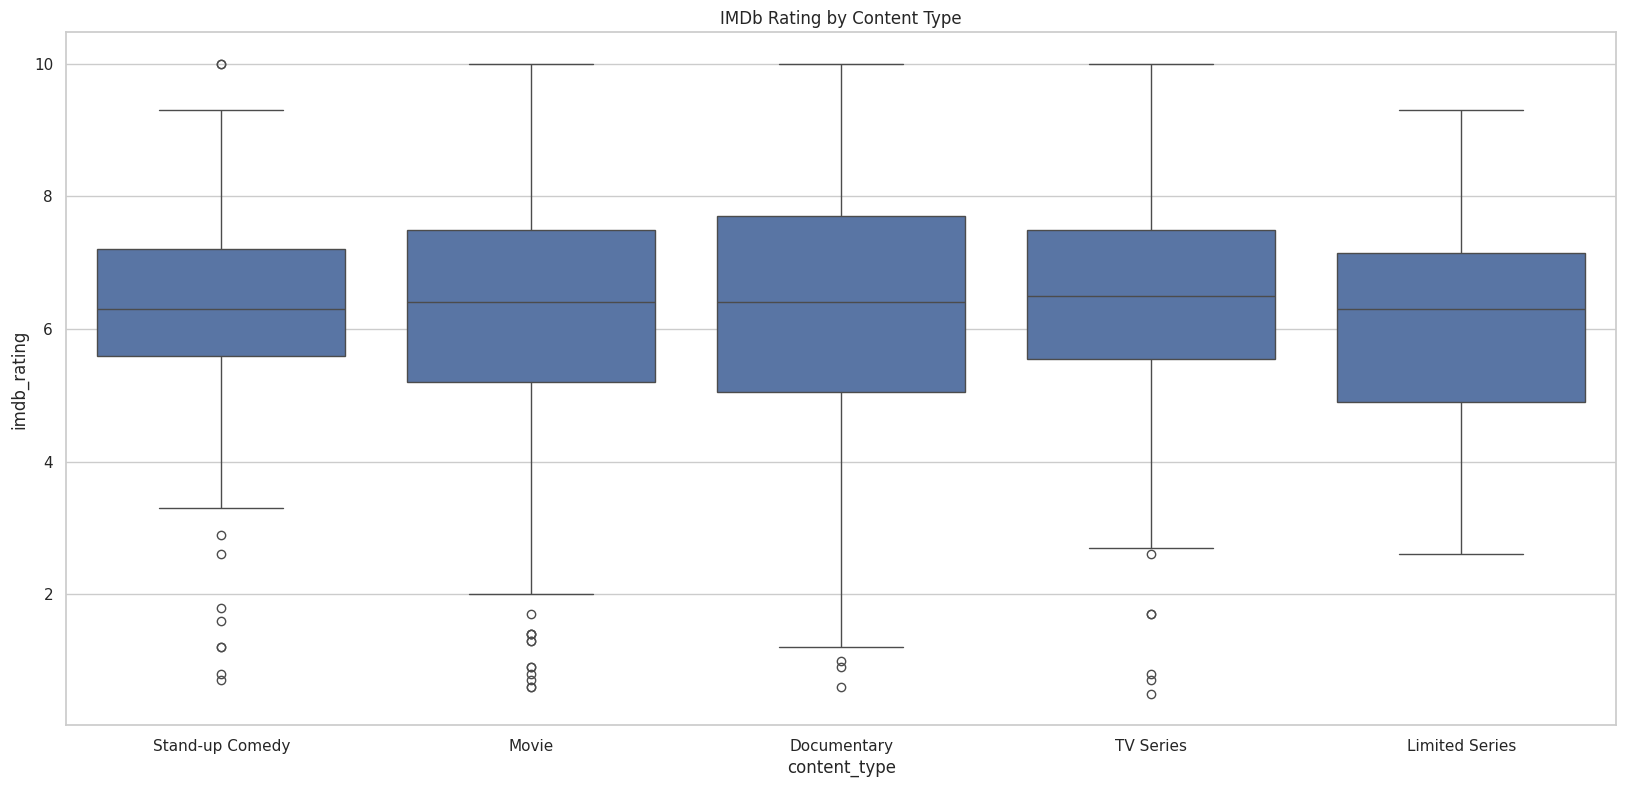

In [418]:
plt.figure(figsize=(20,9))
sns.boxplot(data=movie, x="content_type", y="imdb_rating")
plt.title("IMDb Rating by Content Type")
plt.show()

# Box Office Collection mix also Movie


In [419]:
movie.sort_values(by='box_office_revenue', ascending=False)[['box_office_revenue','title']].max()


box_office_revenue    2032055569.0
title                  Warrior War
dtype: object

# Box Office Collection min  also Movies

In [420]:
movie.sort_values(by='box_office_revenue', ascending=False)[['box_office_revenue','title']].min()


box_office_revenue        28637.0
title                 A Adventure
dtype: object

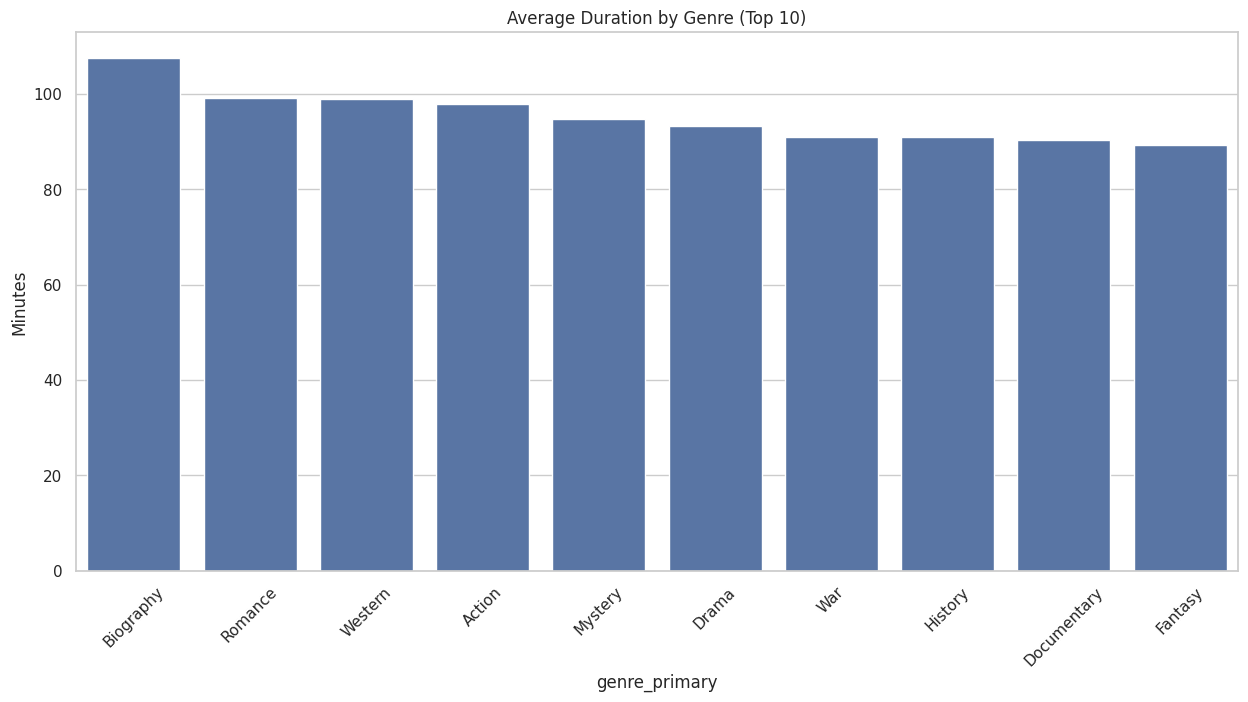

In [421]:
plt.figure(figsize=(15,7))
avg_duration = movie.groupby("genre_primary")["duration_minutes"].mean().nlargest(10)
sns.barplot(x=avg_duration.index, y=avg_duration.values)
plt.title("Average Duration by Genre (Top 10)")
plt.xticks(rotation=45)
plt.ylabel("Minutes")
plt.show()

In [422]:
movie.sort_values(by='number_of_seasons', ascending=False).head(10)[['title','number_of_seasons']]


,title,number_of_seasons
942,Dream Adventure,14.0
901,Mystery Ice,14.0
71,Storm Warrior,14.0
91,Story Kingdom,14.0
887,Adventure Phoenix,14.0
141,Battle Secret,14.0
153,Bright Phoenix,14.0
182,House Phoenix,14.0
231,Kingdom War,14.0
754,Adventure Princess,14.0


In [423]:
movie['duration_minutes'].mean()


np.float64(89.845)

# How Much Release MOvie IN 2018

In [424]:
movie[(movie['release_year'] == 2018) & (movie['is_netflix_original'] == True)].sort_values(by='imdb_rating', ascending=False)

,movie_id,title,content_type,genre_primary,genre_secondary,release_year,duration_minutes,rating,language,country_of_origin,imdb_rating,production_budget,box_office_revenue,number_of_seasons,number_of_episodes,is_netflix_original,added_to_platform,content_warning,Datee
521,movie_0522,Big Warrior,Documentary,Romance,NaN,2018,62.0,TV-G,Hindi,Germany,8.1,NaN,NaN,NaN,NaN,True,2022-08-31,False,2018-01-01
33,movie_0034,Mission Kingdom,TV Series,War,Horror,2018,48.0,TV-PG,English,India,7.7,NaN,NaN,14.0,138.0,True,2023-10-22,True,2018-01-01
830,movie_0831,Quest Hero,Documentary,Fantasy,NaN,2018,91.0,G,English,France,7.0,NaN,NaN,NaN,NaN,True,2023-09-01,False,2018-01-01
933,movie_0934,Kingdom House,TV Series,Comedy,NaN,2018,23.0,TV-G,English,Canada,6.8,NaN,NaN,2.0,22.0,True,2021-03-02,True,2018-01-01
776,movie_0777,House Dragon,Movie,Comedy,Drama,2018,73.0,TV-Y,English,USA,6.7,NaN,NaN,NaN,NaN,True,2023-11-30,False,2018-01-01
895,movie_0896,Phoenix Hero,Documentary,Romance,NaN,2018,76.0,NC-17,English,Japan,6.6,NaN,NaN,NaN,NaN,True,2023-09-30,True,2018-01-01
76,movie_0077,Our Battle,TV Series,War,History,2018,26.0,TV-14,English,USA,6.4,NaN,NaN,5.0,95.0,True,2024-12-03,False,2018-01-01
367,movie_0368,The Empire,Movie,Western,Fantasy,2018,95.0,TV-PG,French,Canada,6.1,29387509.0,NaN,NaN,NaN,True,2021-05-17,False,2018-01-01
16,movie_0017,Kingdom Battle,Stand-up Comedy,War,NaN,2018,72.0,NC-17,Italian,UK,5.9,NaN,NaN,NaN,NaN,True,2021-10-13,False,2018-01-01
905,movie_0906,Mystery Mystery,Movie,Fantasy,Western,2018,93.0,PG-13,English,USA,3.5,2480786.0,NaN,NaN,NaN,True,2023-06-07,False,2018-01-01


# How much Orginal content

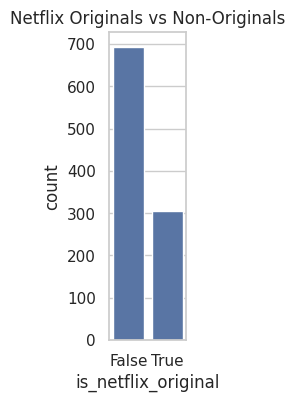

In [425]:
plt.figure(figsize=(1,4))
sns.countplot(data=movie, x="is_netflix_original")
plt.title("Netflix Originals vs Non-Originals")
plt.xticks([0,1])
plt.show()

# Revenue

In [426]:
movie.groupby('genre_primary')['box_office_revenue'].sum().sort_values(ascending=False)

genre_primary
War            3.140307e+09
Sci-Fi         1.307820e+09
Sport          1.271885e+09
Adventure      1.214093e+09
Western        1.174375e+09
Comedy         1.161562e+09
Family         1.149240e+09
History        1.104390e+09
Thriller       9.612753e+08
Biography      9.491907e+08
Fantasy        8.622292e+08
Documentary    8.262046e+08
Mystery        8.163965e+08
Crime          8.034703e+08
Horror         7.524357e+08
Action         6.852512e+08
Romance        6.758790e+08
Animation      5.790048e+08
Drama          4.700248e+08
Music          3.014076e+08
Name: box_office_revenue, dtype: float64

In [427]:
movie.groupby('release_year')['imdb_rating'].mean()

release_year
1953    4.000000
1954    6.400000
1956    7.150000
1961    6.800000
1963    7.700000
1965    6.500000
1966    6.150000
1973         NaN
1978    7.000000
1979         NaN
1981    6.900000
1984         NaN
1986    7.400000
1990    5.706897
1991    5.822222
1992    6.994737
1993    5.824138
1994    5.755556
1995    5.620000
1996    5.965000
1997    6.390625
1998    6.605556
1999    6.622727
2000    7.138095
2001    6.542308
2002    6.213333
2003    5.953571
2004    5.470000
2005    6.125000
2006    5.700000
2007    6.933333
2008    6.623810
2009    6.875000
2010    6.460000
2011    5.787097
2012    6.100000
2013    7.236842
2014    5.750000
2015    6.250000
2016    6.404762
2017    6.148000
2018    6.130303
2019    5.984211
2020    6.518182
2021    6.515000
2022    6.956522
2023    6.712000
2024    6.296296
Name: imdb_rating, dtype: float64

# Average IMDb Rating Over Time

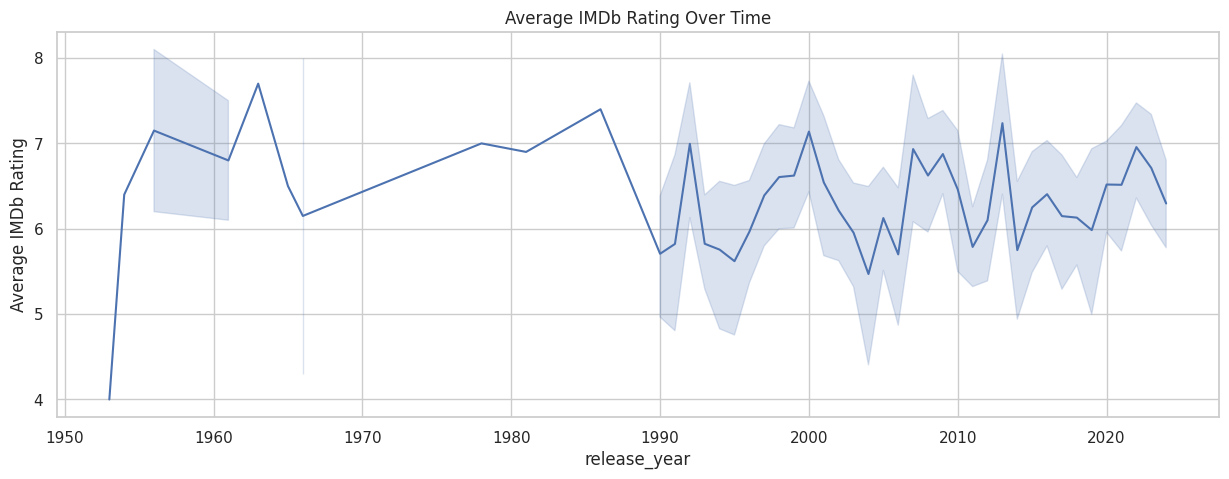

In [428]:
plt.figure(figsize=(15,5))
sns.lineplot(data=movie, x="release_year", y="imdb_rating")
plt.title("Average IMDb Rating Over Time")
plt.ylabel("Average IMDb Rating")
plt.show()

Explored Netflix user data to uncover preferences across
genres, durations, and binge sessions.
• Performed in-depth EDA using pandas and created plots
using seaborn.
• Interpreted viewing trends to support content
recommendation strategies,
Year with the most releases,
Most common genres,
Top countries producing content,
Netflix Originals vs Non-Originals,
Budget vs Revenue relationship....

In [429]:
st

<module 'streamlit' from '/home/anni/anaconda3/envs/streamlit-env/lib/python3.10/site-packages/streamlit/__init__.py'>